# Final Project Template 

# Dan's Final Project Template

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

Hemophagocytic lymphohistiocytosis (HLH) is a T-cell mediated inflammatory syndrome associated with immune activation and NK cell dysfunction. In the context of CAR T-cells, HLH occurs in a subset of those with cytokine release syndrome (CRS) and results in increased patient morbidity. HLH is often refactory to IL-6 blockade, the agent traditionally used to treat CAR T-cell related inflammatory toxicities, and requires the addition IL-1R blockade. Early intervention may result in decreased patient morbidity, yet predisposing factors for toxicity development are not yet well established. Here, I seek to use patient and product characteristics from an ongoing phase 1 study of CAR T-cells to develop a model to predict those at increased risk of HLH.

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

https://docs.google.com/spreadsheets/d/105tnzeA-DAopCogKvVu_GtYx8PbSncc7jJikEVNAcKg/edit?usp=sharing

In [1]:
from IPython.display import IFrame
IFrame(src="https://docs.google.com/spreadsheets/d/105tnzeA-DAopCogKvVu_GtYx8PbSncc7jJikEVNAcKg/edit?usp=sharing", width='100%', height='500px')

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [1]:
#!pip install xgboost 
import pandas as pd
#import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
import xgboost as xgb
import re
import matplotlib.pyplot as plt


df = pd.read_csv("DL_Final_Proj.csv")

In [2]:
df.describe()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
count,67.000000,67.000000,60.000000,60.000000,62.000000,59.00000,59.000000,59.000000,57.000000,55.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,47.000000,47.000000,48.000000,48.000000,33.000000
mean,531.283582,0.119403,0.350000,0.866667,0.677419,0.40678,0.254237,0.644068,52.621474,46.510909,...,1.271833,1.378292,1.215583,178.289583,177.705625,101.846383,0.974170,1.027875,21.425042,1176.578485
std,309.443969,0.326709,0.480995,0.342803,0.471280,0.49545,0.439169,0.482905,35.010957,31.727449,...,2.769635,1.187720,3.911200,423.783595,265.607171,161.177838,3.072776,1.425467,14.893415,1086.562946
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.050000,0.500000,...,0.230000,0.700000,0.110000,0.370000,5.630000,0.220000,0.210000,0.240000,4.750000,154.040000
25%,283.500000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,20.000000,14.100000,...,0.280000,0.717500,0.120000,5.890000,36.847500,14.730000,0.250000,0.292000,11.475000,636.880000
50%,556.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,52.600000,52.600000,...,0.340000,0.792000,0.140000,21.415000,73.865000,38.070000,0.260000,0.730000,16.995000,889.340000
75%,812.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.500000,1.000000,87.000000,76.650000,...,0.837500,1.632500,0.811500,62.420000,164.895000,120.900000,0.435000,1.125000,27.025000,1161.360000
max,988.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,97.000000,...,17.740000,5.940000,27.070000,1530.000000,1198.000000,714.650000,20.900000,9.370000,66.940000,4961.220000


In [3]:
df.head()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.6,14.8,...,3.03,0.70,0.11,2.34,199.24,3.81,0.27,0.25,18.92,NaN
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.0,16.4,...,0.35,1.63,0.12,39.16,143.12,56.94,0.39,1.15,15.07,746.89
2,16,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.0,14.8,...,0.81,1.14,0.13,4.07,36.78,1.83,0.80,0.77,5.05,NaN
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.6,54.1,...,0.33,2.65,2.65,12.28,20.61,31.58,0.30,0.73,11.59,633.19


In [4]:
df.tail()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
62,934,0,0.0,1.0,1.0,1.0,0.0,1.0,27.0,6.6,...,0.27,1.44,1.44,58.33,74.84,13.90,0.36,0.80,27.00,1336.93
63,951,0,0.0,1.0,0.0,1.0,0.0,1.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,954,0,1.0,1.0,0.0,0.0,0.0,0.0,75.0,56.8,...,17.74,2.72,27.07,1472.00,1148.00,706.98,20.90,9.37,37.95,4373.75
65,985,0,1.0,1.0,0.0,0.0,1.0,1.0,85.0,88.9,...,0.29,0.71,0.12,29.58,105.35,45.08,0.25,0.76,15.81,1269.76
66,988,0,0.0,1.0,1.0,1.0,0.0,0.0,77.0,12.8,...,0.78,2.19,2.19,90.34,72.89,60.60,0.49,0.82,12.78,1389.20


In [5]:
df.dtypes

RANDOMIZED ID                           int64
Exclude from Analysis (0=No/1=Yes)      int64
HLH (0=No/1=Yes)                      float64
CRS (0=N/1=Y)                         float64
Prior HCT (0=N/1=Y)                   float64
                                       ...   
Cytokines_Day 9_IL-10                 float64
Cytokines_Day 9_IL-12p70              float64
Cytokines_Day 9_IL-13                 float64
Cytokines_Day 9_IL-15                 float64
Cytokines_Day 9_IL-18                 float64
Length: 143, dtype: object

In [6]:
#checking to make sure no object type variables 
df.select_dtypes(include='object')

""
0
1
2
3
4
...
62
63
64
65


In [7]:
df.shape

(67, 143)

In [8]:
#assigning pts who were not infused to be excluded
exclude = df[df['Exclude from Analysis (0=No/1=Yes)'] == 1].index
exclude

Int64Index([2, 7, 8, 17, 33, 45, 46, 58], dtype='int64')

In [9]:
#excluding non-infused pts, only infused (inf) remain
df_inf = df.drop(exclude, axis=0)
df_inf

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.600,14.8,...,3.030,0.700,0.110,2.34,199.24,3.81,0.270,0.250,18.920,NaN
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.000,16.4,...,0.350,1.630,0.120,39.16,143.12,56.94,0.390,1.150,15.070,746.89
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.000,14.8,...,0.810,1.140,0.130,4.07,36.78,1.83,0.800,0.770,5.050,NaN
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.600,54.1,...,0.330,2.650,2.650,12.28,20.61,31.58,0.300,0.730,11.590,633.19
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.400,69.6,...,0.330,2.960,0.130,5.83,16.75,23.53,0.300,0.730,6.970,NaN
6,49,0,0.0,0.0,0.0,0.0,0.0,1.0,35.100,40.4,...,0.280,0.750,0.140,1.09,445.00,0.22,0.240,0.240,7.410,NaN
9,95,0,1.0,1.0,0.0,1.0,0.0,0.0,0.630,96.2,...,0.280,0.720,0.120,20.40,40.59,40.41,0.260,0.410,39.410,889.34
10,143,0,1.0,1.0,1.0,0.0,1.0,0.0,42.200,51.5,...,0.350,0.700,0.140,27.12,40.97,168.55,0.250,0.240,39.480,NaN
11,145,0,0.0,1.0,0.0,0.0,0.0,1.0,60.000,75.0,...,0.920,0.720,0.310,168.60,120.03,117.50,0.450,0.280,13.480,1052.87
12,173,0,1.0,1.0,1.0,0.0,0.0,1.0,90.000,87.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#looking at correlation generally
cor = df_inf.corr(method='spearman')
cor 

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
RANDOMIZED ID,1.000000,NaN,0.209952,0.243152,-0.077817,0.224897,-0.038858,-0.114331,0.287104,-0.182366,...,0.184241,0.045728,0.241140,0.347605,0.207794,0.227505,0.097445,0.260170,0.300879,0.431484
Exclude from Analysis (0=No/1=Yes),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HLH (0=No/1=Yes),0.209952,NaN,1.000000,0.272750,-0.122489,0.032978,0.135037,-0.186717,0.183565,0.207150,...,0.237171,-0.109639,-0.015036,0.370750,0.168819,0.378188,0.015571,0.054665,0.397220,0.286578
CRS (0=N/1=Y),0.243152,NaN,0.272750,1.000000,-0.015435,0.303822,-0.026523,-0.272750,0.107264,0.049599,...,0.186072,-0.094461,0.051350,0.310330,-0.137355,0.528719,0.015884,-0.030550,0.422240,NaN
Prior HCT (0=N/1=Y),-0.077817,NaN,-0.122489,-0.015435,1.000000,-0.050803,0.133255,-0.031274,0.155074,-0.146235,...,-0.131573,0.095678,-0.112560,-0.050362,0.043167,-0.136280,0.015454,0.145814,-0.071944,-0.078604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cytokines_Day 9_IL-10,0.227505,NaN,0.378188,0.528719,-0.136280,0.033032,0.067279,-0.241133,0.249975,-0.017140,...,0.345201,0.061109,0.265289,0.706096,0.246130,1.000000,0.207800,0.223272,0.582362,0.247326
Cytokines_Day 9_IL-12p70,0.097445,NaN,0.015571,0.015884,0.015454,0.098069,-0.104310,-0.046541,0.169418,-0.280819,...,0.573500,0.324798,0.375598,0.494098,0.332740,0.207800,1.000000,0.515694,0.162801,0.194739
Cytokines_Day 9_IL-13,0.260170,NaN,0.054665,-0.030550,0.145814,0.011113,0.201802,-0.020525,0.335844,-0.217986,...,0.272282,0.501904,0.463979,0.580684,0.588334,0.223272,0.515694,1.000000,0.208263,0.436026
Cytokines_Day 9_IL-15,0.300879,NaN,0.397220,0.422240,-0.071944,0.269658,0.270004,-0.097804,0.369559,-0.110927,...,0.277695,-0.028145,0.127398,0.589922,0.391073,0.582362,0.162801,0.208263,1.000000,0.242981


In [11]:
#Correlation with output variable
cor_target = abs(cor["HLH (0=No/1=Yes)"])

#Selecting highly correlated features
corr50_features, corr40_features, corr30_features = cor_target[cor_target>0.5], cor_target[cor_target>0.4], cor_target[cor_target>0.3]
print(corr30_features)

HLH (0=No/1=Yes)                          1.000000
Baseline BM_T:NK Ratio                    0.454762
TCS (0=No/1=Yes)                          0.399399
Max Grade CRS                             0.447424
 Ferritin_Day 5 (ng/mL) [4-6]             0.402709
 Ferritin_Day 9 (ng/mL) [8-10]            0.439016
Toci (0=N/1=Y)                            0.562667
TBNK_Baseline_T:NK Ratio                  0.311811
TBNK_Baseline_CD8:NK Ratio                0.322209
TBNK_Day 0 [-1-2]_1_T:NK Ratio            0.370530
TBNK_Day 0 [-1-2]_1_CD8:NK Ratio          0.482388
TBNK_Day 0 [-1-2]_1_%NK                   0.409056
CAR EXPANSION (% of T Cells)_Day 10-14    0.315226
Prod_%CD3_PS_PT                           0.333418
Prod_Cx Day 7_%CD3                        0.353579
Prod_Cx Day 7_%NK                         0.472912
Prod_Cx Day Final_%CD3                    0.358045
Prod_Cx Day Final_%NK                     0.319209
CBC_Day CRS_mono (abs)                    0.304395
Cytokines_Day 0_IL-18          

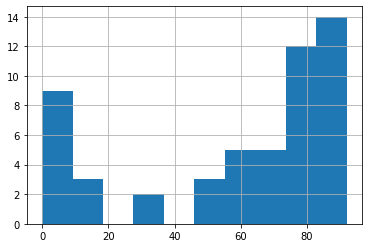

In [12]:
#visualizing histograms of data
#df_inf.iloc[:, 2:17].hist()
df_inf["CAR EXPANSION (% of T Cells)_Day 10-14"].hist()
pl.show()


In [13]:
#visualizing HLH by grade of CRS, making dummy variables for each

pd.crosstab(df_inf['HLH (0=No/1=Yes)'], df_inf['Max Grade CRS'], rownames=['HLH_infused'])

dummy_ranks = pd.get_dummies(df_inf['Max Grade CRS'], prefix='Max Grade CRS')
dummy_ranks.head()
cols_to_keep = df_inf.drop(columns='Max Grade CRS')
cols_to_keep

df_crs = cols_to_keep.join(dummy_ranks.iloc[:,:])
df_crs.head()
df_crs


,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18,Max Grade CRS_0.0,Max Grade CRS_1.0,Max Grade CRS_2.0,Max Grade CRS_3.0,Max Grade CRS_4.0
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.600,14.8,...,3.81,0.270,0.250,18.920,NaN,0,1,0,0,0
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.000,16.4,...,56.94,0.390,1.150,15.070,746.89,0,1,0,0,0
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.000,14.8,...,1.83,0.800,0.770,5.050,NaN,1,0,0,0,0
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.600,54.1,...,31.58,0.300,0.730,11.590,633.19,0,0,1,0,0
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.400,69.6,...,23.53,0.300,0.730,6.970,NaN,0,1,0,0,0
6,49,0,0.0,0.0,0.0,0.0,0.0,1.0,35.100,40.4,...,0.22,0.240,0.240,7.410,NaN,1,0,0,0,0
9,95,0,1.0,1.0,0.0,1.0,0.0,0.0,0.630,96.2,...,40.41,0.260,0.410,39.410,889.34,0,0,1,0,0
10,143,0,1.0,1.0,1.0,0.0,1.0,0.0,42.200,51.5,...,168.55,0.250,0.240,39.480,NaN,0,0,1,0,0
11,145,0,0.0,1.0,0.0,0.0,0.0,1.0,60.000,75.0,...,117.50,0.450,0.280,13.480,1052.87,0,0,1,0,0
12,173,0,1.0,1.0,1.0,0.0,0.0,1.0,90.000,87.9,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0


In [14]:
#visualizing HLH by dose level, making dummy variables for each

pd.crosstab(df_crs['HLH (0=No/1=Yes)'], df_inf['Dose Level'], rownames=['HLH_infused'])

dummy_ranks2 = pd.get_dummies(df_crs['Dose Level'], prefix='Dose Level')
dummy_ranks2.head()
cols_to_keep2 = df_crs.drop(columns='Dose Level')
cols_to_keep2

df_fin = cols_to_keep2.join(dummy_ranks2.iloc[:,:])
df_fin.head()
df_fin

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18,Max Grade CRS_0.0,Max Grade CRS_1.0,Max Grade CRS_2.0,Max Grade CRS_3.0,Max Grade CRS_4.0,Dose Level_1.0,Dose Level_2.0,Dose Level_3.0
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.600,14.8,...,18.920,NaN,0,1,0,0,0,1,0,0
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.000,16.4,...,15.070,746.89,0,1,0,0,0,0,0,1
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.000,14.8,...,5.050,NaN,1,0,0,0,0,1,0,0
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.600,54.1,...,11.590,633.19,0,0,1,0,0,0,1,0
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.400,69.6,...,6.970,NaN,0,1,0,0,0,1,0,0
6,49,0,0.0,0.0,0.0,0.0,0.0,1.0,35.100,40.4,...,7.410,NaN,1,0,0,0,0,0,1,0
9,95,0,1.0,1.0,0.0,1.0,0.0,0.0,0.630,96.2,...,39.410,889.34,0,0,1,0,0,1,0,0
10,143,0,1.0,1.0,1.0,0.0,1.0,0.0,42.200,51.5,...,39.480,NaN,0,0,1,0,0,1,0,0
11,145,0,0.0,1.0,0.0,0.0,0.0,1.0,60.000,75.0,...,13.480,1052.87,0,0,1,0,0,1,0,0
12,173,0,1.0,1.0,1.0,0.0,0.0,1.0,90.000,87.9,...,NaN,NaN,0,0,1,0,0,1,0,0


## 4) Show me the head of your data.

In [15]:
df_fin.head()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18,Max Grade CRS_0.0,Max Grade CRS_1.0,Max Grade CRS_2.0,Max Grade CRS_3.0,Max Grade CRS_4.0,Dose Level_1.0,Dose Level_2.0,Dose Level_3.0
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.6,14.8,...,18.92,NaN,0,1,0,0,0,1,0,0
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.0,16.4,...,15.07,746.89,0,1,0,0,0,0,0,1
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.0,14.8,...,5.05,NaN,1,0,0,0,0,1,0,0
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.6,54.1,...,11.59,633.19,0,0,1,0,0,0,1,0
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.4,69.6,...,6.97,NaN,0,1,0,0,0,1,0,0


## 5) Show me the shape of your data

In [16]:
df_fin.shape

(59, 149)

## 6) Show me the proportion of missing observations for each column of your data

In [17]:
df_fin.isna().sum()
#df_fin.notna().sum()

RANDOMIZED ID                         0
Exclude from Analysis (0=No/1=Yes)    0
HLH (0=No/1=Yes)                      0
CRS (0=N/1=Y)                         0
Prior HCT (0=N/1=Y)                   0
                                     ..
Max Grade CRS_3.0                     0
Max Grade CRS_4.0                     0
Dose Level_1.0                        0
Dose Level_2.0                        0
Dose Level_3.0                        0
Length: 149, dtype: int64

In [18]:
df_fin.isna().sum().sum()

1313

In [19]:
df_fin.notna().sum().sum()

7478

In [20]:
#determining % of missing data
df_fin.isna().sum().sum() / (df_fin.isna().sum().sum() + df_fin.notna().sum().sum())

0.14935729723580934

In [21]:
#looking at correlation generally
cor2 = df_fin.corr(method='spearman')
cor2 

#Correlation with output variable
cor_target2 = abs(cor2["HLH (0=No/1=Yes)"])

#Selecting highly correlated features
corr2_50_features, corr2_40_features, corr2_30_features = cor_target2[cor_target2>0.5], cor_target2[cor_target2>0.4], cor_target2[cor_target2>0.3]
print(corr2_30_features)

corr2_30_features.size

HLH (0=No/1=Yes)                          1.000000
Baseline BM_T:NK Ratio                    0.454762
TCS (0=No/1=Yes)                          0.399399
 Ferritin_Day 5 (ng/mL) [4-6]             0.402709
 Ferritin_Day 9 (ng/mL) [8-10]            0.439016
Toci (0=N/1=Y)                            0.562667
TBNK_Baseline_T:NK Ratio                  0.311811
TBNK_Baseline_CD8:NK Ratio                0.322209
TBNK_Day 0 [-1-2]_1_T:NK Ratio            0.370530
TBNK_Day 0 [-1-2]_1_CD8:NK Ratio          0.482388
TBNK_Day 0 [-1-2]_1_%NK                   0.409056
CAR EXPANSION (% of T Cells)_Day 10-14    0.315226
Prod_%CD3_PS_PT                           0.333418
Prod_Cx Day 7_%CD3                        0.353579
Prod_Cx Day 7_%NK                         0.472912
Prod_Cx Day Final_%CD3                    0.358045
Prod_Cx Day Final_%NK                     0.319209
CBC_Day CRS_mono (abs)                    0.304395
Cytokines_Day 0_IL-18                     0.392677
Cytokines_Day 5_GM-CSF         

28

In [22]:
#trying to do below in a diff way

#assigning correlated variables to new df
corr = pd.DataFrame([cor_target2]); corr

#marking as NaN the variables without high corr
highcorr_tokeep = corr[corr >= .3]; highcorr_tokeep

#dropping NaN values
lowcorr_dropped = highcorr_tokeep.dropna(axis=1, how ='any'); lowcorr_dropped

#asssigning names of kept columns
highcorr_coltokeep = lowcorr_dropped.columns; highcorr_coltokeep.size

#assigning randomized ID to add back in (since was dropped in prior step)
df_randomizedID = df_fin['RANDOMIZED ID']

#creating df w/ just high corr fts (and randomized ID)
df_corr30 = df_fin[highcorr_coltokeep];df_corr30 
df_corr30 = df_corr30.join(df_randomizedID); df_corr30

,HLH (0=No/1=Yes),Baseline BM_T:NK Ratio,TCS (0=No/1=Yes),Ferritin_Day 5 (ng/mL) [4-6],Ferritin_Day 9 (ng/mL) [8-10],Toci (0=N/1=Y),TBNK_Baseline_T:NK Ratio,TBNK_Baseline_CD8:NK Ratio,TBNK_Day 0 [-1-2]_1_T:NK Ratio,TBNK_Day 0 [-1-2]_1_CD8:NK Ratio,...,Cytokines_Day 5_GM-CSF,Cytokines_Day 5_IL-18,Cytokines_Day 7_IL-18,Cytokines_Day 9_IFN-gamma,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-15,Max Grade CRS_1.0,Max Grade CRS_2.0,RANDOMIZED ID
0,0.0,0.396783,1.0,8047.0,7503.0,0.0,23.950000,13.325000,1.514436,0.582677,...,0.540,NaN,NaN,2.86,2.34,3.81,18.920,1,0,6
1,0.0,0.552189,0.0,NaN,NaN,0.0,8.010101,1.242424,6.637255,1.647059,...,0.570,486.78,447.55,493.16,39.16,56.94,15.070,1,0,9
3,0.0,8.705882,0.0,NaN,NaN,0.0,30.156250,13.718750,NaN,NaN,...,NaN,NaN,NaN,35.93,4.07,1.83,5.050,0,0,25
4,0.0,1.438830,0.0,NaN,NaN,0.0,3.983333,1.255556,NaN,NaN,...,2.990,232.97,270.88,72.17,12.28,31.58,11.590,0,1,37
5,0.0,7.909091,0.0,NaN,NaN,0.0,10.474576,3.627119,11.680556,3.250000,...,2.990,NaN,NaN,120.32,5.83,23.53,6.970,1,0,41
6,0.0,1.518797,1.0,325.0,220.0,0.0,1.112462,0.583587,8.206522,2.369565,...,0.550,NaN,NaN,4.02,1.09,0.22,7.410,0,0,49
9,1.0,25.315789,1.0,1701.0,14063.0,1.0,4.431694,2.295082,16.245614,5.701754,...,0.590,578.63,567.00,495.50,20.40,40.41,39.410,0,1,95
10,1.0,10.957447,1.0,2318.0,8500.0,0.0,13.405797,6.884058,NaN,NaN,...,0.540,NaN,NaN,211.81,27.12,168.55,39.480,0,1,143
11,0.0,3.886010,1.0,1258.0,94587.0,1.0,44.947368,14.368421,79.083333,20.000000,...,0.840,215.56,333.07,837.68,168.60,117.50,13.480,0,1,145
12,1.0,13.523077,1.0,9059.0,35430.0,1.0,36.692308,14.230769,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,173


In [23]:
#bad way of doing above

#highcorr = pd.DataFrame([cor_target2 >=.3]); highcorr
#lowcorr_todrop = highcorr[highcorr == False]; lowcorr_todrop
#lowcorr_dropped = lowcorr_todrop.dropna(axis=1, how ='any'); lowcorr_dropped
#lowcorr_coltodrop = lowcorr_dropped.columns; lowcorr_coltodrop

In [24]:
#lowcorr_coltodrop[:20], lowcorr_coltodrop[21:40], lowcorr_coltodrop[41:60], lowcorr_coltodrop[61:80], lowcorr_coltodrop[81:100], lowcorr_coltodrop[101:122]

In [25]:
#df_highcorr = df_fin.drop(columns = ['RANDOMIZED ID', 'Exclude from Analysis (0=No/1=Yes)', 'CRS (0=N/1=Y)',
#        'Prior HCT (0=N/1=Y)', 'Prior Blina (0=N/1=Y)', 'Prior Ino (0=N/1=Y)',
#        'Prior CAR (0=N/1=Y)', 'Bone marrow_%Leukemia', 'Baseline BM_%T cell',
#        'Baseline BM_%NK Cell', '>/= M2 Marrow (0=N/1=Y)',
#        'Extramedullary Disease (0=No/1=Yes)',
#        'CRP (baseline (-30 - -2)) (mg/dL)', 'CRP (peak (5-22)) ',
#        ' Ferritin_Baseline (ng/mL)', 'CR (0=No/1=Yes)', 'TBNK_Baseline_%CD3',
#        'TBNK_Baseline_%CD4', 'TBNK_Baseline_%CD8',
#        'TBNK_Baseline_CD4:CD8 Ratio', 'TBNK_Baseline_%NK', 'TBNK_Day 0 [-1-2]_1_%CD3',
#        'TBNK_Day 0 [-1-2]_1_%CD4', 'TBNK_Day 0 [-1-2]_1_%CD8',
#        'TBNK_Day 0 [-1-2]_1_CD4:CD8 Ratio', 'TBNK_Day 0 [-1-2]_1_CD4:NK Ratio',
#        'TBNK_Day 7 [5-9]_1_%CD3', 'TBNK_Day 7 [5-9]_1_%CD4',
#        'TBNK_Day 7 [5-9]_1_%CD8', 'TBNK_Day 7 [5-9]_1_CD4:CD8 Ratio',
#        'TBNK_Day 7 [5-9]_1_T:NK Ratio', 'TBNK_Day 7 [5-9]_1_CD8:NK Ratio',
#        'TBNK_Day 7 [5-9]_1_CD4:NK Ratio', 'TBNK_Day 7 [5-9]_1_%NK',
#        'CAR EXPANSION (absolute)_Day 10-14', 'Prod_Aph-Bag)_%CD3',
#        'Prod_Aph-Bag)_%CD4', 'Prod_Aph-Bag)_%CD8',
#        'Prod_Aph-Bag)_CD4:CD8 Ratio', 'Prod_Aph-Bag)_T:NK Ratio', 'Prod_Aph-Bag)_CD4:NK Ratio',
#        'Prod_Aph-Bag)_CD8:NK Ratio', 'Prod_Post-Sel_%CD3',
#        'Prod_Post-Sel_%CD4', 'Prod_Post-Sel_%CD8',
#        'Prod_Post-Sel_CD4:CD8 Ratio', 'Prod_Post-Sel_%NK',
#        'Prod_Cx Day 7_%CD4', 'Prod_Cx Day 7_%CD8',
#        'Prod_Cx Day 7_CD4:CD8 Ratio', 'Prod_Cx Day Final_%CD4',
#        'Prod_Cx Day Final_%CD8', 'Prod_Cx Day Final_CD4:CD8 Ratio',
#        'Prod_Cx Day Final_%Protein L', 'CBC_Baseline_#leuk (abs)',
#        'CBC_Baseline_#neut (abs)', 'CBC_Baseline_# lympho (abs)',
#        'CBC_Baseline_mono (abs)', 'CBC_Day 0_#neut (abs)', 'CBC_Day 0_# lympho (abs)',
#        'CBC_Day 0_mono (abs)', 'CBC_Day CRS_#leuk (abs)',
#        'CBC_Day CRS_#neut (abs)', 'CBC_Day CRS_# lympho (abs)',
#        'Cytokines_Day 0_IFN-gamma', 'Cytokines_Day 0_GM-CSF',
#        'Cytokines_Day 0_TNF-alpha', 'Cytokines_Day 0_MIP-alpha',
#        'Cytokines_Day 0_IL-1B', 'Cytokines_Day 0_IL-2', 'Cytokines_Day 0_IL-4',
#        'Cytokines_Day 0_IL-6', 'Cytokines_Day 0_IL-8', 'Cytokines_Day 0_IL-10',
#        'Cytokines_Day 0_IL-12p70', 'Cytokines_Day 0_IL-13',
#        'Cytokines_Day 0_IL-15', 'Cytokines_Day 5_TNF-alpha', 'Cytokines_Day 5_MIP-alpha',
#        'Cytokines_Day 5_IL-1B', 'Cytokines_Day 5_IL-2', 'Cytokines_Day 5_IL-4',
#        'Cytokines_Day 5_IL-6', 'Cytokines_Day 5_IL-8', 'Cytokines_Day 5_IL-10',
#        'Cytokines_Day 5_IL-12p70', 'Cytokines_Day 5_IL-13',
#        'Cytokines_Day 5_IL-15', 'Cytokines_Day 7_IFN-gamma',
#        'Cytokines_Day 7_GM-CSF', 'Cytokines_Day 7_TNF-alpha',
#        'Cytokines_Day 7_MIP-alpha', 'Cytokines_Day 7_IL-1B',
#        'Cytokines_Day 7_IL-2', 'Cytokines_Day 7_IL-4', 'Cytokines_Day 7_IL-6', 'Cytokines_Day 7_IL-10', 'Cytokines_Day 7_IL-12p70',
#        'Cytokines_Day 7_IL-13', 'Cytokines_Day 7_IL-15',
#        'Cytokines_Day 9_GM-CSF', 'Cytokines_Day 9_TNF-alpha',
#        'Cytokines_Day 9_MIP-alpha', 'Cytokines_Day 9_IL-1B',
#        'Cytokines_Day 9_IL-2', 'Cytokines_Day 9_IL-4', 'Cytokines_Day 9_IL-8',
#        'Cytokines_Day 9_IL-12p70', 'Cytokines_Day 9_IL-13',
#        'Cytokines_Day 9_IL-18', 'Max Grade CRS_0.0', 'Max Grade CRS_3.0',
#        'Max Grade CRS_4.0', 'Dose Level_1.0', 'Dose Level_2.0',
#        'Dose Level_3.0'] , axis=1)
#df_highcorr

In [26]:
#now have dataset (df_corr30) with ONLY parameters that have correlation (abs) >.3, w/ exception of randomized ID
cor3 = df_corr30.corr('spearman')
cor_target3 = abs(cor3["HLH (0=No/1=Yes)"]); cor_target3, cor_target3.size


(HLH (0=No/1=Yes)                          1.000000
 Baseline BM_T:NK Ratio                    0.454762
 TCS (0=No/1=Yes)                          0.399399
  Ferritin_Day 5 (ng/mL) [4-6]             0.402709
  Ferritin_Day 9 (ng/mL) [8-10]            0.439016
 Toci (0=N/1=Y)                            0.562667
 TBNK_Baseline_T:NK Ratio                  0.311811
 TBNK_Baseline_CD8:NK Ratio                0.322209
 TBNK_Day 0 [-1-2]_1_T:NK Ratio            0.370530
 TBNK_Day 0 [-1-2]_1_CD8:NK Ratio          0.482388
 TBNK_Day 0 [-1-2]_1_%NK                   0.409056
 CAR EXPANSION (% of T Cells)_Day 10-14    0.315226
 Prod_%CD3_PS_PT                           0.333418
 Prod_Cx Day 7_%CD3                        0.353579
 Prod_Cx Day 7_%NK                         0.472912
 Prod_Cx Day Final_%CD3                    0.358045
 Prod_Cx Day Final_%NK                     0.319209
 CBC_Day CRS_mono (abs)                    0.304395
 Cytokines_Day 0_IL-18                     0.392677
 Cytokines_D

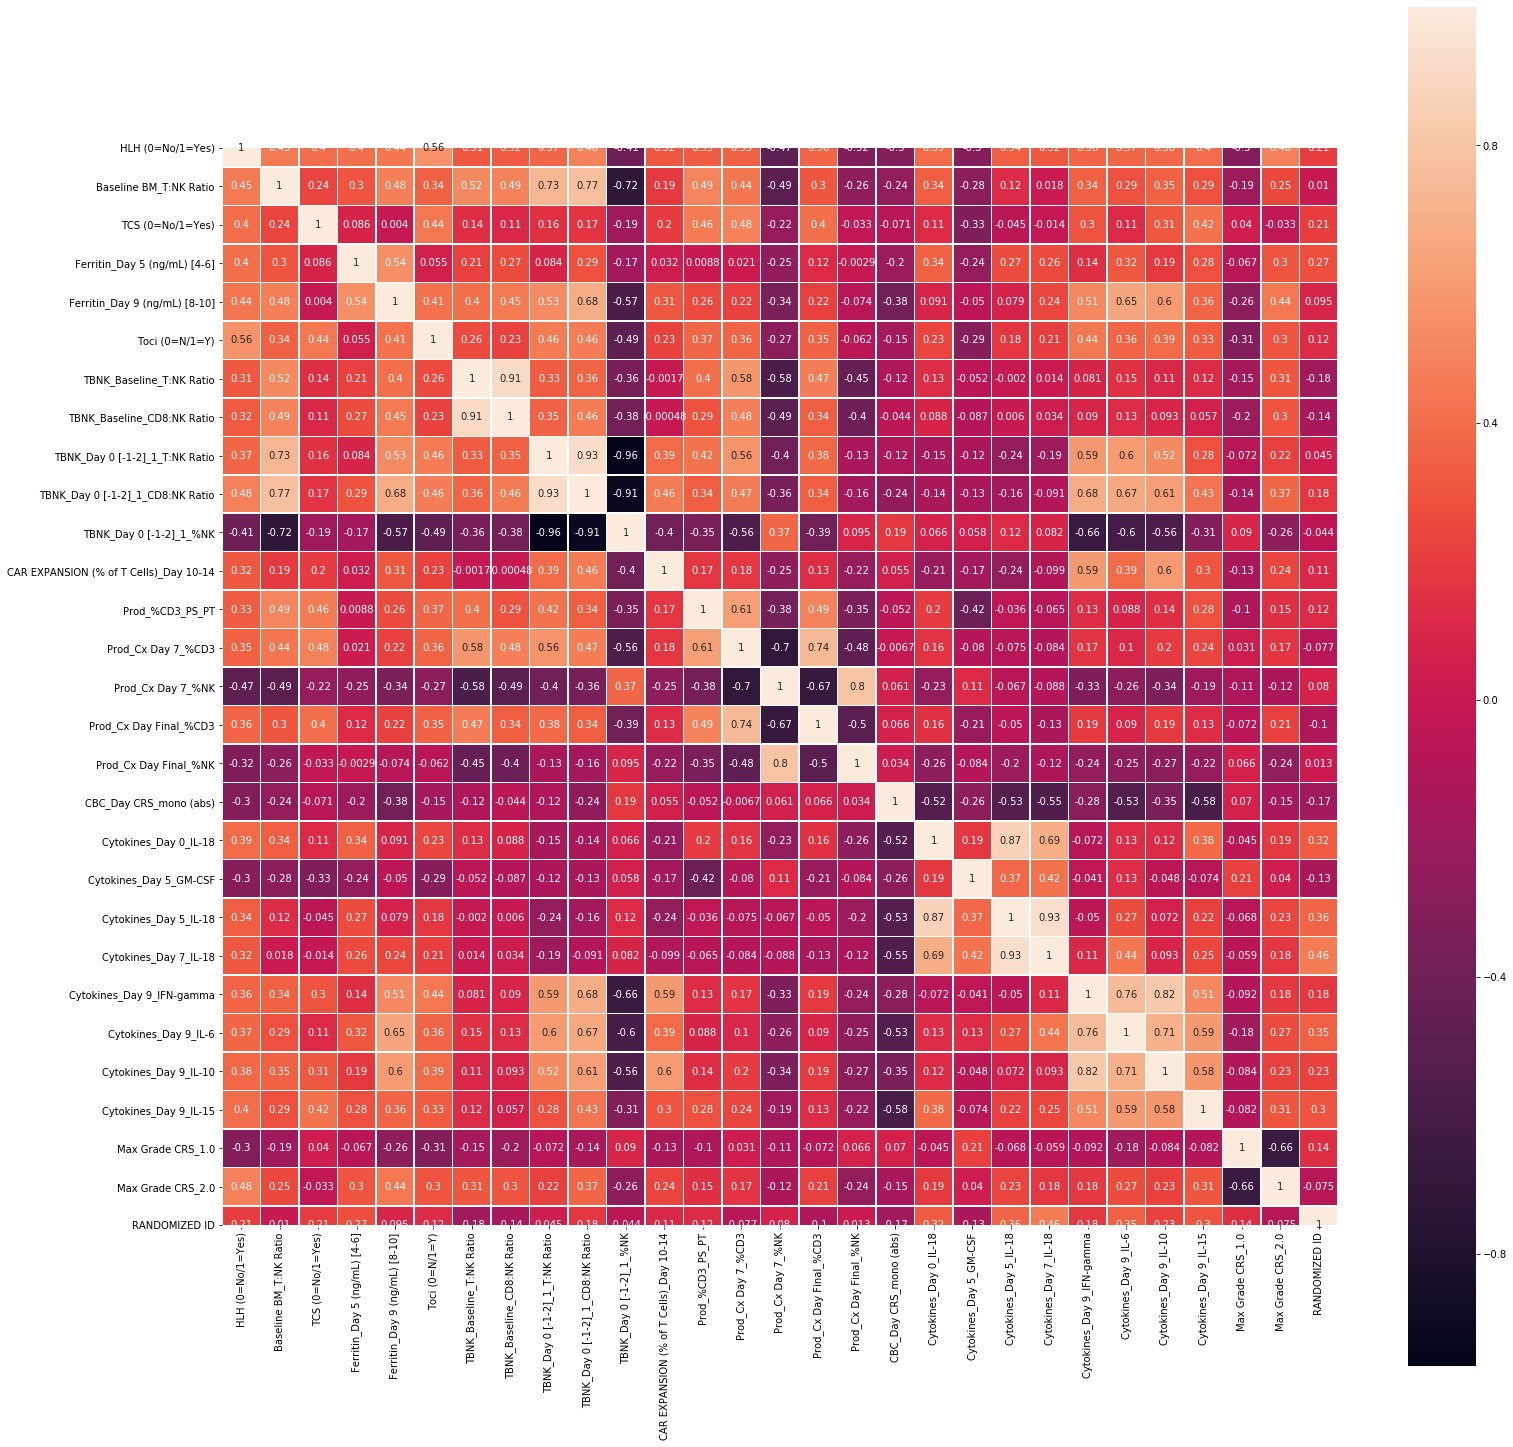

In [27]:
#heatmap of variables
fig, ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.heatmap(df_corr30.iloc[:,:].corr(method='spearman'), square=True, annot=True, linewidths=.5, ax=ax)

#there are a lot of variables that correlate with eachoteher, will have to deal with that
#eg since %NK feeds into T:NK ratios, etc

#INTERESTING that T:NK and CD8:NK at baseline and day 0 (though correlate with eachother at baseline) do NOT correlate with sim params at subsequent timepoints

In [28]:
#there are too many variables with highly ovelapping features
#dropping redundancies in a targeted manner
#drop cytokines b/c not easily obtainable thus not very useful for predictive model
#drop day 9 ferritin as it is closer to median day HLH onset than day 5, and highly correlated w/ other
#drop%NK and T:NK ratio for day 0 timepoint b/c CD8 more useful marker of HLH pathogen, and CD8:NK ratio captures both CD8 and NK params in a more useful manner
#drop CAR expansion day 10-14 as a bit late for predictive model, and may not be easily obtainable (depending on clinical center)
#KEEPING all product params as none are more correlated than .8
#drop toci b/c confounding 2/2 changing clinical practice

#will DROP TCS for now, and make two models (one w/, one w/o)
df_noTCS = df_corr30.drop(columns = [' Ferritin_Day 9 (ng/mL) [8-10]', 'TCS (0=No/1=Yes)','Toci (0=N/1=Y)', 'TBNK_Baseline_T:NK Ratio', 'TBNK_Day 0 [-1-2]_1_T:NK Ratio', 'TBNK_Day 0 [-1-2]_1_%NK', 'CAR EXPANSION (% of T Cells)_Day 10-14',
                                  'Cytokines_Day 0_IL-18', 'Cytokines_Day 5_GM-CSF', 'Cytokines_Day 5_IL-18', 'Cytokines_Day 7_IL-18', 'Cytokines_Day 9_IFN-gamma', 'Cytokines_Day 9_IL-6', 'Cytokines_Day 9_IL-10', 'Cytokines_Day 9_IL-15'], axis = 1)
df_noTCS, df_noTCS.shape

(    HLH (0=No/1=Yes)  Baseline BM_T:NK Ratio   Ferritin_Day 5 (ng/mL) [4-6]  \
 0                0.0                0.396783                         8047.0   
 1                0.0                0.552189                            NaN   
 3                0.0                8.705882                            NaN   
 4                0.0                1.438830                            NaN   
 5                0.0                7.909091                            NaN   
 6                0.0                1.518797                          325.0   
 9                1.0               25.315789                         1701.0   
 10               1.0               10.957447                         2318.0   
 11               0.0                3.886010                         1258.0   
 12               1.0               13.523077                         9059.0   
 13               0.0                     NaN                            NaN   
 14               0.0                4.8

In [29]:
df_noTCS.isna().sum(), df_corr30.isna().sum()

(HLH (0=No/1=Yes)                     0
 Baseline BM_T:NK Ratio               4
  Ferritin_Day 5 (ng/mL) [4-6]       13
 TBNK_Baseline_CD8:NK Ratio           0
 TBNK_Day 0 [-1-2]_1_CD8:NK Ratio    27
 Prod_%CD3_PS_PT                      5
 Prod_Cx Day 7_%CD3                   0
 Prod_Cx Day 7_%NK                    1
 Prod_Cx Day Final_%CD3               0
 Prod_Cx Day Final_%NK               18
 CBC_Day CRS_mono (abs)               7
 Max Grade CRS_1.0                    0
 Max Grade CRS_2.0                    0
 RANDOMIZED ID                        0
 dtype: int64, HLH (0=No/1=Yes)                           0
 Baseline BM_T:NK Ratio                     4
 TCS (0=No/1=Yes)                           0
  Ferritin_Day 5 (ng/mL) [4-6]             13
  Ferritin_Day 9 (ng/mL) [8-10]            14
 Toci (0=N/1=Y)                             1
 TBNK_Baseline_T:NK Ratio                   0
 TBNK_Baseline_CD8:NK Ratio                 0
 TBNK_Day 0 [-1-2]_1_T:NK Ratio            27
 TBNK_Day 0 

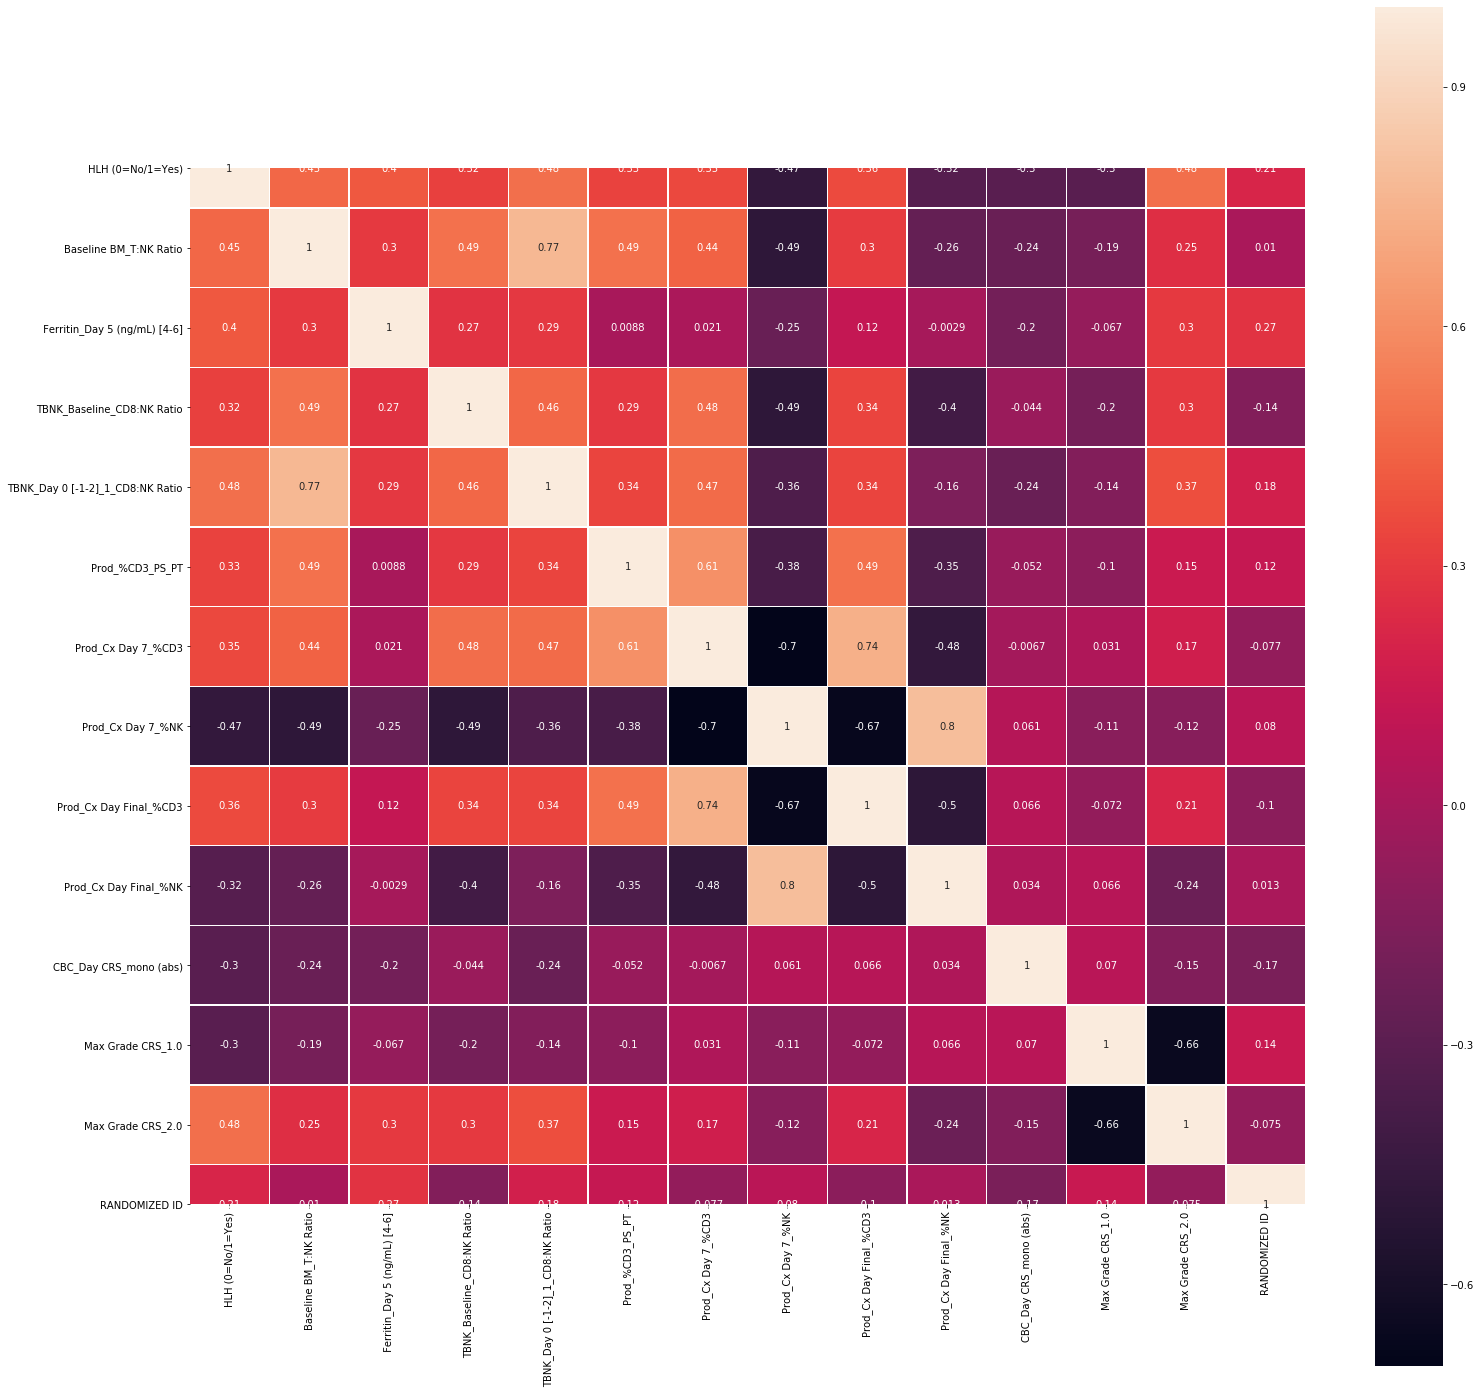

In [30]:
fig, ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.heatmap(df_noTCS.iloc[:,:].corr(method='spearman'), square=True, annot=True, linewidths=.5, ax=ax)

In [31]:
#dealing with error resulting from ' and < symbols in columns
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df_noTCS.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_noTCS.columns.values]

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

#### HLH

In [32]:
#assigning predictors (X) and target (y)
X = df_noTCS.drop(columns=['HLH (0=No/1=Yes)'], axis=1); X
y = df_noTCS['HLH (0=No/1=Yes)']; y
X.shape, df_noTCS.shape, y.shape

((59, 13), (59, 14), (59,))

In [224]:
from sklearn.model_selection import train_test_split

#reproducibility
test_size = .33
k=4
seed=42

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# XG BOOST MODELING

In [225]:
#xgboost for df_fin dataset using xgboost as model b/c built in method to deal with missing values
from xgboost.sklearn import XGBClassifier
X_dmatrix = xgb.DMatrix(data=X,label=y)
X_train_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
X_test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

xg_class = xgb.XGBClassifier(objective ='binary:logistic', random_state = seed)

xg_class.fit(X_train,y_train)

preds = xg_class.predict(X_test)

preds

/Users/danlichtenstein/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/danlichtenstein/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0.])

In [226]:
#looking at classification report to see how model did
from sklearn.metrics import classification_report
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.81        13
         1.0       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20



In [227]:
# train-test split evaluation of xgboost model (default params)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.00%


In [228]:
HLH_neg = df_noTCS[df_noTCS['HLH (0=No/1=Yes)'] == 0].index
HLH_pos = df_noTCS[df_noTCS['HLH (0=No/1=Yes)'] == 1].index

#HLH_incidence
HLH_pos.size/(HLH_pos.size + HLH_neg.size)

#so, if always guess HLH- expect ~65% accuracy

0.3559322033898305

In [229]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds)

array([[11,  2],
       [ 3,  4]])

In [230]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#calculating true psoitives, false positives, true negatives, false negatives
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
(tn, fp, fn, tp)

sens = tp/(tp+fn)
spec = tn/(tn+fp)

sens, spec

(0.5714285714285714, 0.8461538461538461)

In [231]:
# k-fold cross validation evaluation of xgboost model (default params)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#X, y = df_fin.iloc[:,3:],df_fin.iloc[:,2] #X=predictors (dataset sans target); y=target

kfold = KFold(n_splits=k, random_state=seed, shuffle = True)
results_def = cross_val_score(xg_class, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results_def.mean()*100, results_def.std()*100))
results_def

Accuracy: 76.07% (8.28%)


array([0.8       , 0.73333333, 0.86666667, 0.64285714])

In [232]:
# stratified k-fold cross validation evaluation of xgboost model (default params)
from sklearn.model_selection import StratifiedKFold

#X, y = df_fin.iloc[:,3:],df_fin.iloc[:,2] #X=predictors (dataset sans target); y=target

kfold_strat = StratifiedKFold(n_splits=k, random_state=seed, shuffle = True)
results_strat = cross_val_score(xg_class, X, y, cv=kfold_strat)
print("Accuracy: %.2f%% (%.2f%%)" % (results_strat.mean()*100, results_strat.std()*100))
results_strat

Accuracy: 81.49% (8.65%)


array([0.75      , 0.86666667, 0.92857143, 0.71428571])

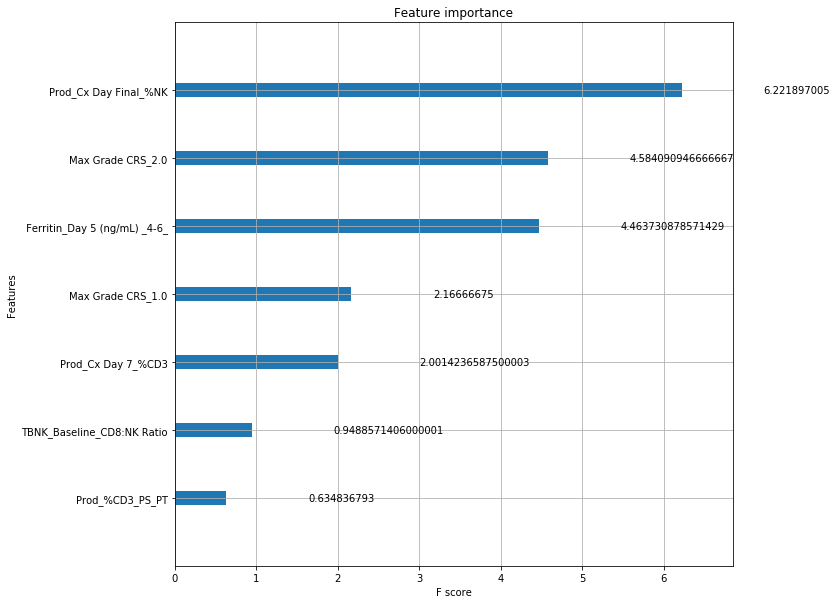

In [233]:
#ft importance of test set w/ default params

#https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7
#‘Coverage’ measures the relative quantity of observations concerned by a feature.”
#“The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature’s 
    #contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important 
    #for generating a prediction.
    #IE: ‘Gain’ is the improvement in accuracy brought by a feature to the branches it is on.
#The Weight (python) is the percentage representing the relative number of times a particular feature occurs in the trees of the model.
    
import matplotlib.pyplot as plt

params_default = {'max_depth': 3,'learning_rate': 0.1, 'n_estimators' : 999, 'verbosity':1, 'booster': 'gbtree', 'n_jobs' :1, 'gamma': 0,  "objective":"binary:logistic",'colsample_bytree': 1, 'scale_pos_weight' : 1, 
           'min_child_weight': 1, 'max_delta_step': 0, 'subsample':1, 'colsample_bytree':1, 'colsample_bylevel':1, 'colsample_bynode':1, 
          'reg_alpha':0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'base_score': .5, 'random_state': seed}
    

xg_classifier_train = xgb.train(params= params_default, dtrain = X_train_dmatrix, num_boost_round=10)

#xgb.plot_importance(xg_classifier_train, importance_type = 'weight')
#xgb.plot_importance(xg_classifier_train, importance_type = 'cover')
xgb.plot_importance(xg_classifier_train, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

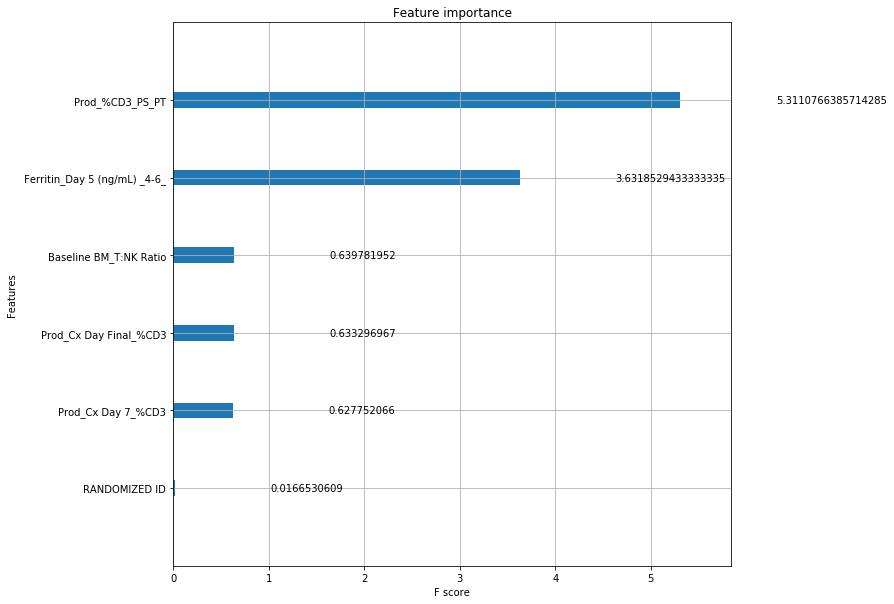

In [234]:
#ft importance of test set w/ default params
import matplotlib.pyplot as plt

xg_classifier_test = xgb.train(params= params_default, dtrain = X_test_dmatrix, num_boost_round=10)

#xgb.plot_importance(xg_classifier_test, importance_type = 'weight')
#xgb.plot_importance(xg_classifier_test, importance_type = 'cover')
xgb.plot_importance(xg_classifier_test, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

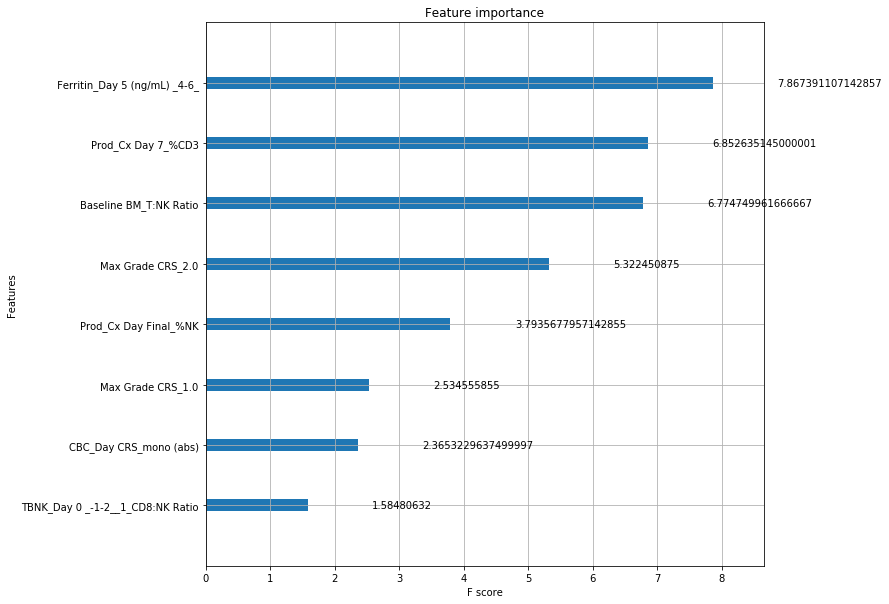

In [235]:
#ft importance of overall set w/ default params
import matplotlib.pyplot as plt


xg_classifier = xgb.train(params= params_default, dtrain = X_dmatrix, num_boost_round=10)

#xgb.plot_importance(xg_classifier, importance_type = 'weight')
#xgb.plot_importance(xg_classifier, importance_type = 'cover')
xgb.plot_importance(xg_classifier, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [236]:
#alt way of looking @ important fts


model = xg_class
model.fit(X_train, y_train)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
11,Max Grade CRS_2.0,0.176633
8,Prod_Cx Day Final_%NK,0.173736
5,Prod_Cx Day 7_%CD3,0.148193
1,Ferritin_Day 5 (ng/mL) _4-6_,0.112715
0,Baseline BM_T:NK Ratio,0.091363
9,CBC_Day CRS_mono (abs),0.079124
10,Max Grade CRS_1.0,0.071177
4,Prod_%CD3_PS_PT,0.068148
2,TBNK_Baseline_CD8:NK Ratio,0.056032
3,TBNK_Day 0 _-1-2__1_CD8:NK Ratio,0.022879


In [237]:
#alt way of looking @ important fts
#important fts very different between train and test sets in baseline


model = xg_class
model.fit(X_test, y_test)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
4,Prod_%CD3_PS_PT,0.416971
1,Ferritin_Day 5 (ng/mL) _4-6_,0.259142
5,Prod_Cx Day 7_%CD3,0.112929
7,Prod_Cx Day Final_%CD3,0.094529
0,Baseline BM_T:NK Ratio,0.047079
3,TBNK_Day 0 _-1-2__1_CD8:NK Ratio,0.041626
12,RANDOMIZED ID,0.027722
2,TBNK_Baseline_CD8:NK Ratio,0.000000
6,Prod_Cx Day 7_%NK,0.000000
8,Prod_Cx Day Final_%NK,0.000000


[0]	validation_0-error:0.076923	validation_0-logloss:0.634882	validation_1-error:0.3	validation_1-logloss:0.662067
[1]	validation_0-error:0.076923	validation_0-logloss:0.589775	validation_1-error:0.3	validation_1-logloss:0.639466
[2]	validation_0-error:0.128205	validation_0-logloss:0.550912	validation_1-error:0.25	validation_1-logloss:0.621435
[3]	validation_0-error:0.128205	validation_0-logloss:0.51716	validation_1-error:0.25	validation_1-logloss:0.6071
[4]	validation_0-error:0.128205	validation_0-logloss:0.487654	validation_1-error:0.25	validation_1-logloss:0.595797
[5]	validation_0-error:0.025641	validation_0-logloss:0.451789	validation_1-error:0.3	validation_1-logloss:0.584724
[6]	validation_0-error:0.025641	validation_0-logloss:0.420067	validation_1-error:0.35	validation_1-logloss:0.576464
[7]	validation_0-error:0.025641	validation_0-logloss:0.399008	validation_1-error:0.3	validation_1-logloss:0.57115
[8]	validation_0-error:0.025641	validation_0-logloss:0.372818	validation_1-error

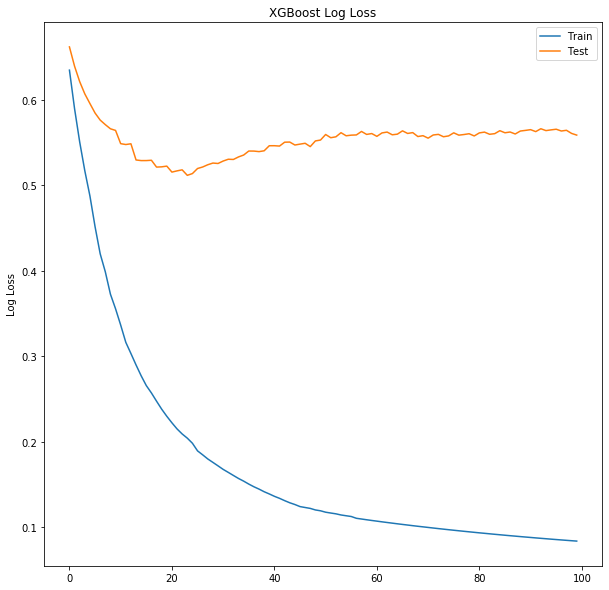

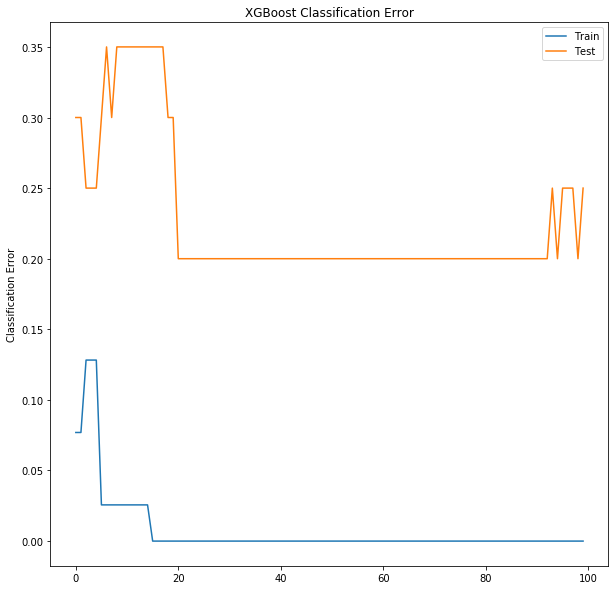

In [238]:
#classification error rate and log loss of default parameters
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/
#Log loss, short for logarithmic loss is a loss function for classification that quantifies the price paid for the inaccuracy of predictions 
    #in classification problems. Log loss penalizes false classifications by taking into account the probability of classification.

from matplotlib import pyplot

model = xg_class
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost Default: ROC AUC=0.709


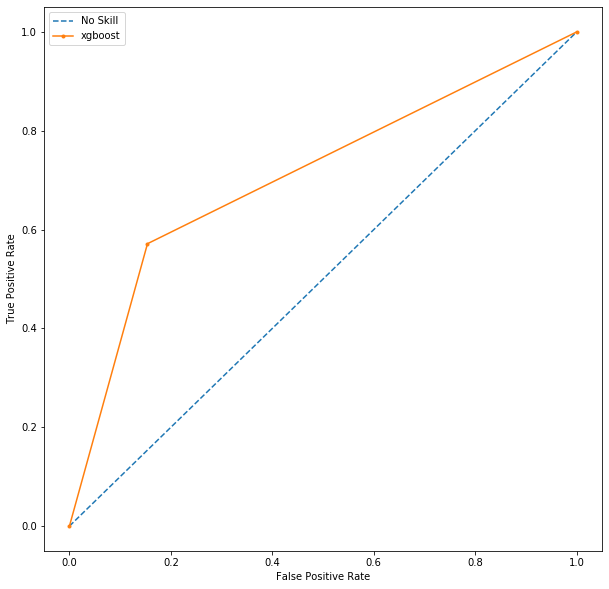

In [239]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

#ROC: Plots false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 
    #0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# split into train/test sets
# implementing train-test-split [performed above already]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#fitting model
#xg_class = xgb.XGBClassifier(objective ='binary:logistic', random_state = seed, cv=cv)
#xg_class.fit(X_train,y_train)

#making preds
#preds = xg_class.predict(X_test)

preds
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]; ns_probs

# keep probabilities for the positive outcome only
#HOW??
preds_probs = preds

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
preds_auc = roc_auc_score(y_test, preds_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost Default: ROC AUC=%.3f' % (preds_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
preds_fpr, preds_tpr, _ = roc_curve(y_test, preds_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(preds_fpr, preds_tpr, marker='.', label='xgboost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

XGBoost Default: f1=0.615 auc=0.694


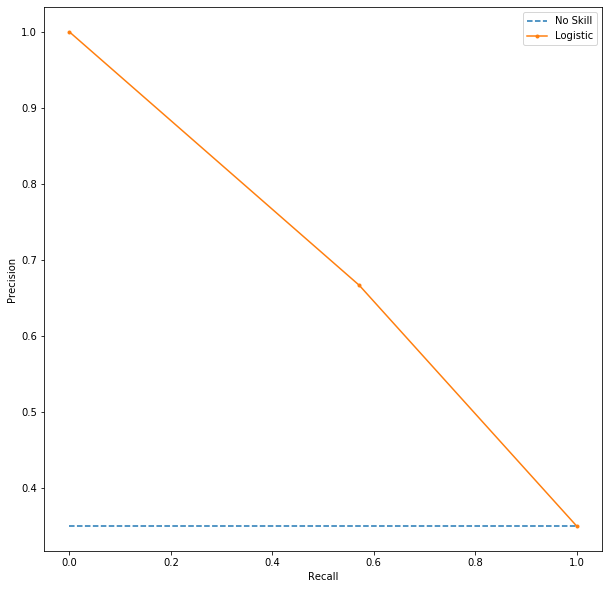

In [240]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#Precision = Positive Predictive Power = True Positives / (True Positives + False Positives)
#Recall = Sensitivity = True Positives / (True Positives + False Negatives)

# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# generate 2 class dataset
#X = df_noTCS.drop(columns=['HLH (0=No/1=Yes)'], axis=1); X
#y = df_noTCS['HLH (0=No/1=Yes)']; y

# split into train/test sets
# implementing train-test-split [performed above already]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# fit a model
#xg_class = xgb.XGBClassifier(objective ='binary:logistic', random_state = seed, cv=cv)
#xg_class.fit(X_train,y_train)
#preds = xg_class.predict(X_test)

preds
# keep probabilities for the positive outcome only
#HOW??
preds_probs = preds


# predict class values
yhat = xg_class.predict(X_test)
preds_precision, preds_recall, _ = precision_recall_curve(y_test, preds_probs)
preds_f1, preds_auc = f1_score(y_test, yhat), auc(preds_recall, preds_precision)
# summarize scores
print('XGBoost Default: f1=%.3f auc=%.3f' % (preds_f1, preds_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(preds_recall, preds_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Hyperparameter tuning

In [322]:
#Reproducibility: 

cv = kfold_strat

In [323]:
#tuning 'early_stopping_rounds'
from sklearn.model_selection import GridSearchCV

param_test0 = {
 'early_stopping_rounds':range(5,50,5),
}
gsearch0 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = 10), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch0.fit(X_train,y_train)
gsearch0.cv_results_, gsearch0.best_params_, gsearch0.best_score_


({'mean_fit_time': array([0.03760695, 0.05169773, 0.04553044, 0.03810728, 0.03481531,
         0.03561491, 0.02656174, 0.0321508 , 0.03000468]),
  'std_fit_time': array([0.00594509, 0.01227085, 0.02053448, 0.00476696, 0.00275364,
         0.00300527, 0.00122822, 0.00423645, 0.00572434]),
  'mean_score_time': array([0.01522982, 0.02152646, 0.00799024, 0.00724196, 0.0073005 ,
         0.00676781, 0.00967985, 0.00641608, 0.00711244]),
  'std_score_time': array([0.00453661, 0.01618433, 0.00248957, 0.00191676, 0.00215666,
         0.0013789 , 0.00432978, 0.00103805, 0.0016644 ]),
  'param_early_stopping_rounds': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'early_stopping_rounds': 5},
   {'early_stopping_rounds': 10},
   {'early_stopping_rounds': 15},
   {'early_stopping_rounds': 20},
   {'early_stopping_round

In [324]:
#tuning 'max_depth' and 'min_child_weight'
early_stopping_rounds_tuned = 5

from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(3,15,2),
 'min_child_weight':range(1,10,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.03385097, 0.0330022 , 0.03018051, 0.02687937, 0.03062248,
         0.03682894, 0.03410602, 0.02788109, 0.02540261, 0.03040671,
         0.04530221, 0.02756304, 0.02639443, 0.03348154, 0.02939147,
         0.03119314, 0.02535391, 0.02528131, 0.02406132, 0.02538311,
         0.03699827, 0.02770197, 0.03409582, 0.03513998, 0.02988333,
         0.04443258, 0.03354758, 0.02862239, 0.02510154, 0.01570725]),
  'std_fit_time': array([0.00658274, 0.00414094, 0.00204523, 0.00355774, 0.00551005,
         0.00705581, 0.00517661, 0.00223952, 0.00287111, 0.00746509,
         0.00992529, 0.0044722 , 0.00341214, 0.01893299, 0.01042509,
         0.00474152, 0.00691667, 0.0074783 , 0.00629028, 0.00705969,
         0.00860637, 0.00486556, 0.008154  , 0.00614712, 0.00589051,
         0.00942587, 0.00665199, 0.00700994, 0.00675775, 0.0046993 ]),
  'mean_score_time': array([0.01476687, 0.01175261, 0.01165032, 0.01173556, 0.00960261,
         0.00852025, 0.00748926, 0.00924367, 0.

In [325]:
#further tuning min_child_weight and max_depth

param_test1a = {
 'max_depth':[3, 4, 5],
 'min_child_weight':[i/10.0 for i in range (10,30)]
}
gsearch1a = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed), 
 param_grid = param_test1a, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch1a.fit(X_train,y_train)
gsearch1a.cv_results_, gsearch1a.best_params_, gsearch1a.best_score_



({'mean_fit_time': array([0.03537983, 0.05188853, 0.04236889, 0.03749132, 0.03592265,
         0.03394628, 0.03206694, 0.03060049, 0.03573394, 0.03538489,
         0.02816927, 0.03311521, 0.03271157, 0.02728546, 0.02953953,
         0.02478325, 0.02135032, 0.02708936, 0.02394956, 0.02036923,
         0.02918172, 0.035981  , 0.0263077 , 0.03239799, 0.04184806,
         0.02690548, 0.04468954, 0.03774601, 0.03236538, 0.04592007,
         0.03196508, 0.02825522, 0.03301066, 0.0271678 , 0.03059435,
         0.02133942, 0.02724302, 0.0336234 , 0.03530151, 0.04567599,
         0.04714555, 0.03293943, 0.03853309, 0.04976833, 0.03721148,
         0.03421783, 0.029939  , 0.03127182, 0.0268088 , 0.03255051,
         0.03434169, 0.03521097, 0.02848053, 0.02874225, 0.02918035,
         0.02590162, 0.02044207, 0.01992732, 0.01718992, 0.02170289]),
  'std_fit_time': array([0.00535687, 0.01018206, 0.00671841, 0.00635586, 0.00433414,
         0.00176787, 0.00573614, 0.00312272, 0.00514973, 0.0073692 ,

In [326]:
#tuning 'gamma' using identified 'max_depth' and 'min_child_weight'
max_depth_tune = 3
min_child_weight_tune = 1
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'early_stopping_rounds' : early_stopping_rounds_tuned}
param_test2 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.03227341, 0.04403645, 0.03178942, 0.04171747, 0.03238767,
         0.03337014, 0.03479791, 0.03828776, 0.0275225 , 0.03095925]),
  'std_fit_time': array([0.00766999, 0.00315076, 0.00657083, 0.00730678, 0.00341597,
         0.0010281 , 0.00325638, 0.00406737, 0.00514252, 0.00758076]),
  'mean_score_time': array([0.01248604, 0.00769258, 0.00880557, 0.00723404, 0.00990903,
         0.01015848, 0.00854027, 0.00832301, 0.00616479, 0.00593245]),
  'std_score_time': array([0.0016178 , 0.00230814, 0.0014569 , 0.00206712, 0.00511438,
         0.00446738, 0.00198811, 0.00267271, 0.0007775 , 0.00079516]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma'

In [327]:
#tuning 'gamma' using identified 'max_depth' and 'min_child_weight'
gamma_tune = .2
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'early_stopping_rounds' : early_stopping_rounds_tuned, 'gamma': gamma_tune }
param_test3 = {
 'subsample':[i/10.0 for i in range(5,11)],
 'colsample_bytree':[i/10.0 for i in range(5,11)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch3.fit(X_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.02779323, 0.02800268, 0.031672  , 0.031322  , 0.03160781,
         0.03263986, 0.02636552, 0.03219223, 0.03972465, 0.03646702,
         0.03081924, 0.03802598, 0.0334478 , 0.0310359 , 0.03389645,
         0.03934658, 0.03298616, 0.03543407, 0.03948569, 0.03551227,
         0.03031278, 0.03017992, 0.02781957, 0.03089386, 0.02680707,
         0.02162951, 0.03751838, 0.0391643 , 0.04586869, 0.03812993,
         0.0386197 , 0.03812176, 0.03546029, 0.0255639 , 0.0288524 ,
         0.03053373]),
  'std_fit_time': array([0.00536407, 0.00453491, 0.00830944, 0.00681819, 0.00701075,
         0.00974346, 0.00283124, 0.00480485, 0.01087167, 0.01068156,
         0.00158667, 0.01206848, 0.00526016, 0.00844139, 0.00657681,
         0.00747362, 0.00186438, 0.00514268, 0.00549359, 0.00262904,
         0.00879789, 0.00236887, 0.00267096, 0.00875032, 0.00600486,
         0.00164847, 0.00709642, 0.00952374, 0.00770216, 0.00234155,
         0.00699288, 0.00423361, 0.00884247, 0.

In [344]:
#tuning subsample in .05 intervals around determined values

param_test4 = {
 'subsample':[i/100.0 for i in range(60,100,5)],
 'colsample_bytree':[i/100.0 for i in range(30,70,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch4.fit(X_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

#subsample and colsample_bytree changed

({'mean_fit_time': array([0.02761155, 0.03352749, 0.02897602, 0.03249556, 0.02726692,
         0.0328449 , 0.03385735, 0.02994323, 0.03286022, 0.03185093,
         0.02879882, 0.03253657, 0.02785271, 0.0267992 , 0.03151894,
         0.02698028, 0.02282989, 0.02672088, 0.02915406, 0.02048171,
         0.02830744, 0.02575916, 0.02338904, 0.02059942, 0.02273452,
         0.02048624, 0.02616382, 0.02373439, 0.0254696 , 0.02215374,
         0.02426094, 0.02693081, 0.02940273, 0.03553855, 0.04082423,
         0.03206849, 0.03502876, 0.03790748, 0.03908849, 0.03532207,
         0.02481008, 0.03066325, 0.04122299, 0.02637899, 0.0233047 ,
         0.02682632, 0.02513927, 0.02528214, 0.02555752, 0.03544974,
         0.0445869 , 0.04145193, 0.05170834, 0.04197323, 0.04512268,
         0.04033601, 0.03208452, 0.0323264 , 0.03573775, 0.03562206,
         0.04119885, 0.0354557 , 0.02903342, 0.02151263]),
  'std_fit_time': array([0.00743888, 0.00247347, 0.00619149, 0.00783367, 0.0062375 ,
         0.

In [345]:
#tuning regularization parameters
subsample_tune = .9
colsample_bytree_tune = .3
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'early_stopping_rounds' : early_stopping_rounds_tuned,'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune}

param_test5 = {
 'reg_alpha':[0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch5.fit(X_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.02820802, 0.03003174, 0.02857506, 0.03076428, 0.02994388,
         0.02565968, 0.02329642, 0.02249497, 0.02257758]),
  'std_fit_time': array([0.00327976, 0.00176381, 0.00454042, 0.00477547, 0.00539019,
         0.00295991, 0.00309105, 0.00337666, 0.00445059]),
  'mean_score_time': array([0.00599444, 0.00607467, 0.00890964, 0.00892943, 0.00759083,
         0.00800031, 0.00833869, 0.00688094, 0.0054791 ]),
  'std_score_time': array([2.18666916e-04, 5.93482703e-05, 1.84579601e-03, 3.10247521e-03,
         2.04437952e-03, 1.67578279e-03, 3.10936079e-03, 1.29041414e-03,
         9.82589712e-04]),
  'param_reg_alpha': masked_array(data=[0, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 1e-06},
   {'reg_alpha': 1e-05},
   {'reg_alpha': 0.0001},
   {'reg_alpha

In [346]:
#tuning alpha more finely parameters

#param_test6 = {
# 'reg_alpha':[0, .001, .005, .01, .05, .1, .15, .2, .25, .5]
#}
#gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=max_depth_tune,
# min_child_weight=min_child_weight_tune, gamma=gamma_tune, subsample=subsample_tune, colsample_bytree=colsample_bytree_tune,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=seed), 
# param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
#gsearch6.fit(X,y)
#gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_
##reg alpha uncahged

In [347]:
#tuning learning rate
reg_alpha_tune = 1

params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'early_stopping_rounds' : early_stopping_rounds_tuned, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'reg_alpha': reg_alpha_tune}
param_test7 = {
 'learning_rate':[1e-06, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, .2, .3, .5, 1]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch7.fit(X_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_
#changed

({'mean_fit_time': array([0.03217828, 0.03671211, 0.02372491, 0.02402955, 0.02446783,
         0.02360535, 0.02453566, 0.02352101, 0.02437705, 0.022861  ]),
  'std_fit_time': array([0.00738494, 0.00671238, 0.00350687, 0.00377593, 0.00288121,
         0.00519902, 0.00326509, 0.00225457, 0.00480743, 0.00558088]),
  'mean_score_time': array([0.01186001, 0.01423895, 0.00681132, 0.00626802, 0.00670528,
         0.00663573, 0.00778103, 0.00803405, 0.00639898, 0.00728822]),
  'std_score_time': array([6.61807040e-03, 5.64546651e-03, 1.01123488e-03, 3.35590559e-05,
         7.99313176e-04, 5.26234185e-04, 2.10691250e-03, 2.69914406e-03,
         1.91435833e-03, 1.60411857e-03]),
  'param_learning_rate': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5,
                     1],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate':

In [348]:
#tuning learning rate more finely
param_test7a = {
 'learning_rate':[1e-2, 5e-2, 1e-1, 5e-1, 1]
}
gsearch7a = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, learning_rate = .2), 
 param_grid = param_test7a, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch7a.fit(X_train,y_train)
gsearch7a.cv_results_, gsearch7a.best_params_, gsearch7a.best_score_
#unchanged

({'mean_fit_time': array([0.02988476, 0.03607774, 0.02237755, 0.02210152, 0.01646513]),
  'std_fit_time': array([0.00735805, 0.00120308, 0.0106732 , 0.00349662, 0.00399347]),
  'mean_score_time': array([0.0080213 , 0.00788075, 0.00457972, 0.00530523, 0.00682521]),
  'std_score_time': array([0.00279923, 0.00224649, 0.00090695, 0.0006741 , 0.00180769]),
  'param_learning_rate': masked_array(data=[0.01, 0.05, 0.1, 0.5, 1],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.01},
   {'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.5},
   {'learning_rate': 1}],
  'split0_test_score': array([1., 1., 1., 1., 1.]),
  'split1_test_score': array([0.91666667, 0.91666667, 0.91666667, 0.875     , 0.875     ]),
  'split2_test_score': array([0.77777778, 0.77777778, 0.83333333, 0.77777778, 0.66666667]),
  'split3_test_score': array([0.66666667, 0.66666667, 0.72222222, 0.61111111, 0.555

In [349]:
#tuning n_estimators
learning_rate_tune = .1
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'early_stopping_rounds' : early_stopping_rounds_tuned, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune}

param_test8 = {
 'n_estimators':[10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50,55, 60, 65, 70, 75, 85, 90, 95, 100, 105, 110, 115, 125, 150, 175, 200, 350, 400, 450, 500, 750, 1000]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, learning_rate = learning_rate_tune), 
 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch8.fit(X_train,y_train)
gsearch8.cv_results_, gsearch8.best_params_, gsearch8.best_score_
#changed

({'mean_fit_time': array([0.0111264 , 0.01230574, 0.01697522, 0.01587433, 0.01274258,
         0.01214468, 0.01484394, 0.01835477, 0.02083606, 0.01908171,
         0.0216822 , 0.02206057, 0.01924908, 0.02632505, 0.02770644,
         0.01937819, 0.02557123, 0.02929419, 0.02661455, 0.02560419,
         0.03507739, 0.02568686, 0.02863348, 0.03013968, 0.03348392,
         0.02301383, 0.0255754 , 0.03336257, 0.03659934, 0.04159147,
         0.058653  , 0.04117197, 0.05880368, 0.08060062, 0.07821947]),
  'std_fit_time': array([0.00314553, 0.00219754, 0.00716353, 0.00682437, 0.00380091,
         0.00458528, 0.00680637, 0.00520223, 0.00466247, 0.00476999,
         0.00510843, 0.00445753, 0.00226478, 0.00891583, 0.00594699,
         0.00273034, 0.00673355, 0.00928583, 0.00259676, 0.00668906,
         0.00924637, 0.00211987, 0.01171074, 0.00611716, 0.00660949,
         0.00048909, 0.0026901 , 0.0059274 , 0.00929784, 0.00769229,
         0.0127308 , 0.00273329, 0.00707341, 0.02017083, 0.00299287]

In [350]:
#tuning colsample_bynode, colsample_bylevel

n_estimators_tune = 75
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'early_stopping_rounds' : early_stopping_rounds_tuned,'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune, 'n_testimators': n_estimators_tune}
param_test9 = {
 'colsample_bynode': [.5, .6, .7, .8, .9, 1],
    'colsample_bylevel': [.5, .6, .7, .8, .9, 1]
}
gsearch9 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, 
                                                  learning_rate = learning_rate_tune, n_estimators = n_estimators_tune), 
 param_grid = param_test9, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch9.fit(X_train,y_train)
gsearch9.cv_results_, gsearch9.best_params_, gsearch9.best_score_
#changed

({'mean_fit_time': array([0.02054113, 0.0173648 , 0.02511805, 0.01951307, 0.02799129,
         0.02417701, 0.02005512, 0.0209707 , 0.0255422 , 0.02387899,
         0.02332032, 0.02326828, 0.02250129, 0.02761114, 0.02278048,
         0.02630788, 0.02296799, 0.02369547, 0.02478051, 0.02505314,
         0.02673078, 0.02627873, 0.0212366 , 0.02484828, 0.03221756,
         0.03317004, 0.04004121, 0.02732873, 0.02584618, 0.02544862,
         0.02507865, 0.02201033, 0.01762098, 0.01369166, 0.01410067,
         0.01461828]),
  'std_fit_time': array([0.00638042, 0.00067187, 0.00638586, 0.00314823, 0.00523124,
         0.00552856, 0.00390071, 0.00091377, 0.00824051, 0.00640175,
         0.00500506, 0.00608097, 0.00392406, 0.00731177, 0.00377477,
         0.00850847, 0.00384904, 0.00600814, 0.00416579, 0.00375795,
         0.00807577, 0.0041229 , 0.0035971 , 0.00718888, 0.01942987,
         0.01902532, 0.02172737, 0.00446339, 0.00366848, 0.00457189,
         0.00517892, 0.00467467, 0.00836488, 0.

In [351]:
#tuning reg_lambda and verbosity

colsample_bylevel_tune = 1
colsample_bynode_tune = 1

param_test10 = {
    'reg_lambda': [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]
}
gsearch10 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, 
                                                  learning_rate = learning_rate_tune, n_estimators = n_estimators_tune, colsample_bynode = colsample_bynode_tune, colsample_bylevel = colsample_bylevel_tune), 
 param_grid = param_test10, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch10.fit(X_train,y_train)
gsearch10.cv_results_, gsearch10.best_params_, gsearch10.best_score_
#changed

({'mean_fit_time': array([0.02095973, 0.02966094, 0.02759117, 0.02438527, 0.02386093,
         0.02655852, 0.02250928, 0.02544576, 0.01723212, 0.01611674]),
  'std_fit_time': array([0.00364688, 0.00529384, 0.00411367, 0.00525718, 0.00636667,
         0.0005755 , 0.00196536, 0.0036813 , 0.00510384, 0.00462386]),
  'mean_score_time': array([0.01604718, 0.00974703, 0.0086363 , 0.008165  , 0.00896627,
         0.0075503 , 0.00645244, 0.00740701, 0.00545001, 0.00541425]),
  'std_score_time': array([0.00653028, 0.00222643, 0.00182462, 0.00247411, 0.00285235,
         0.0012625 , 0.00026113, 0.00142136, 0.00096926, 0.00116313]),
  'param_reg_lambda': masked_array(data=[0, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_lambda': 0},
   {'reg_lambda': 1e-06},
   {'reg_lambda': 1e-05},
   {'reg_lambda': 0.00

In [352]:
reg_lambda_tune =0

params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'early_stopping_rounds' : early_stopping_rounds_tuned,'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune, 'n_estimators': n_estimators_tune,
              'colsample_bynode': colsample_bynode_tune, 'colsample_bylevel': colsample_bylevel_tune, 'reg_lambda': reg_lambda_tune}

In [353]:
#rerunning model with TUNED HYPERPARAMETER SCORES


xg_class_tuned = xgb.XGBClassifier(cv = cv, random_state = seed, early_stopping_rounds = early_stopping_rounds_tuned, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, 
                                                  learning_rate = learning_rate_tune, n_estimators = n_estimators_tune, colsample_bynode = colsample_bynode_tune, 
                               colsample_bylevel = colsample_bylevel_tune, reg_lambda = reg_lambda_tune) 


xg_class_tuned.fit(X_train,y_train)

preds_tuned = xg_class_tuned.predict(X_test)

preds_tuned


array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0.])

In [354]:
#BS analysis of whole dataset


#preds_ignore = xg_class_tuned.predict(X); preds_ignore
#preds_ignoreD = xg_class.predict(X); preds_ignoreD


#from sklearn.metrics import classification_report
#report = classification_report(y, preds_ignoreD)
#print(report)

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#from sklearn.metrics import confusion_matrix

#confusion_matrix(y, preds_ignoreD)

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#calculating true psoitives, false positives, true negatives, false negatives
#tn, fp, fn, tp = confusion_matrix(y, preds_ignore).ravel()
#(tn, fp, fn, tp)

#sens = tp/(tp+fn)
#spec = tn/(tn+fp)

#sens, spec

In [355]:
#looking at classification report to see how TUNED model did
from sklearn.metrics import classification_report
report = classification_report(y_test, preds_tuned)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        13
         1.0       0.80      0.57      0.67         7

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20



In [356]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds_tuned)

array([[12,  1],
       [ 3,  4]])

In [357]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#calculating true psoitives, false positives, true negatives, false negatives
tn, fp, fn, tp = confusion_matrix(y_test, preds_tuned).ravel()
(tn, fp, fn, tp)

sens = tp/(tp+fn)
spec = tn/(tn+fp)

sens, spec

(0.5714285714285714, 0.9230769230769231)

In [358]:
# train-test split evaluation of xgboost model (tuned params)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds_tuned)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.00%


In [359]:
# k-fold cross validation evaluation of TUNED xgboost model
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score


#kfold = KFold(n_splits=cv, random_state=seed, shuffle = True)
#results_tuned = cross_val_score(xg_class_tuned, X, y, cv=kfold)
#print("New Accuracy: %.2f%% (%.2f%%)" % (results_tuned.mean()*100, results_tuned.std()*100))


#compared to k-fold cross validation of default
#print("Compared to accuracy of default: %.2f%% (%.2f%%)" % (results_def.mean()*100, results_def.std()*100))

#results_tuned


In [360]:
# stratified k-fold cross validation evaluation of xgboost model
#from sklearn.model_selection import StratifiedKFold


#kfold_strat = StratifiedKFold(n_splits=cv, random_state=seed, shuffle = True)
results_strat_tuned = cross_val_score(xg_class_tuned, X, y, cv=kfold_strat)
print("Accuracy: %.2f%% (%.2f%%)" % (results_strat_tuned.mean()*100, results_strat_tuned.std()*100))
print("Compared to accuracy of default: %.2f%% (%.2f%%)" % (results_strat.mean()*100, results_strat.std()*100))

results_strat_tuned

Accuracy: 83.27% (6.96%)
Compared to accuracy of default: 81.49% (8.65%)


array([0.75      , 0.86666667, 0.92857143, 0.78571429])

In [361]:
xg_class_tuned.fit(X_train, y_train)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
11,Max Grade CRS_2.0,0.176633
8,Prod_Cx Day Final_%NK,0.173736
5,Prod_Cx Day 7_%CD3,0.148193
1,Ferritin_Day 5 (ng/mL) _4-6_,0.112715
0,Baseline BM_T:NK Ratio,0.091363
9,CBC_Day CRS_mono (abs),0.079124
10,Max Grade CRS_1.0,0.071177
4,Prod_%CD3_PS_PT,0.068148
2,TBNK_Baseline_CD8:NK Ratio,0.056032
3,TBNK_Day 0 _-1-2__1_CD8:NK Ratio,0.022879


In [362]:
#important variables for test set and training set are now THE SAME, which is good
#might be worth limiting # of features avail to start

xg_class_tuned.fit(X_test, y_test)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
11,Max Grade CRS_2.0,0.176633
8,Prod_Cx Day Final_%NK,0.173736
5,Prod_Cx Day 7_%CD3,0.148193
1,Ferritin_Day 5 (ng/mL) _4-6_,0.112715
0,Baseline BM_T:NK Ratio,0.091363
9,CBC_Day CRS_mono (abs),0.079124
10,Max Grade CRS_1.0,0.071177
4,Prod_%CD3_PS_PT,0.068148
2,TBNK_Baseline_CD8:NK Ratio,0.056032
3,TBNK_Day 0 _-1-2__1_CD8:NK Ratio,0.022879


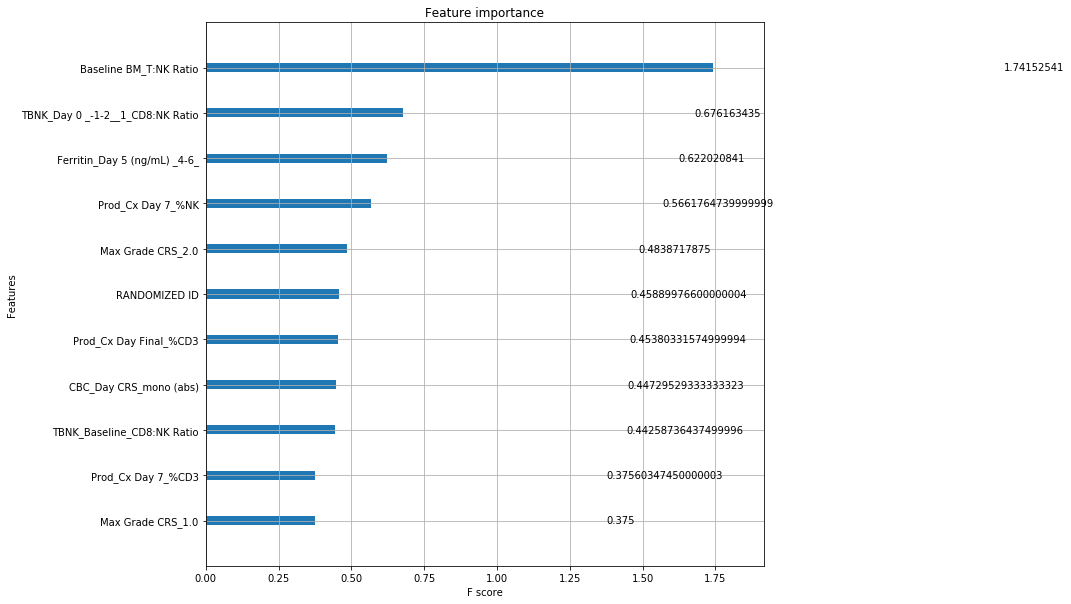

In [363]:

#params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
 #             'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune, 'n_estimators': n_estimators_tune,
  #            'colsample_bynode': colsample_bynode_tune, 'colsample_bylevel': colsample_bylevel_tune, 'reg_lambda': reg_lambda_tune, 'verbosity': verbosity_tune}

xg_classifier_tune_test = xgb.train(params= params_tune, dtrain = X_test_dmatrix, num_boost_round=10)

#xgb.plot_importance(xg_classifier_tune_test, importance_type = 'weight')
#xgb.plot_importance(xg_classifier_tune_test, importance_type = 'cover')
xgb.plot_importance(xg_classifier_tune_test, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()




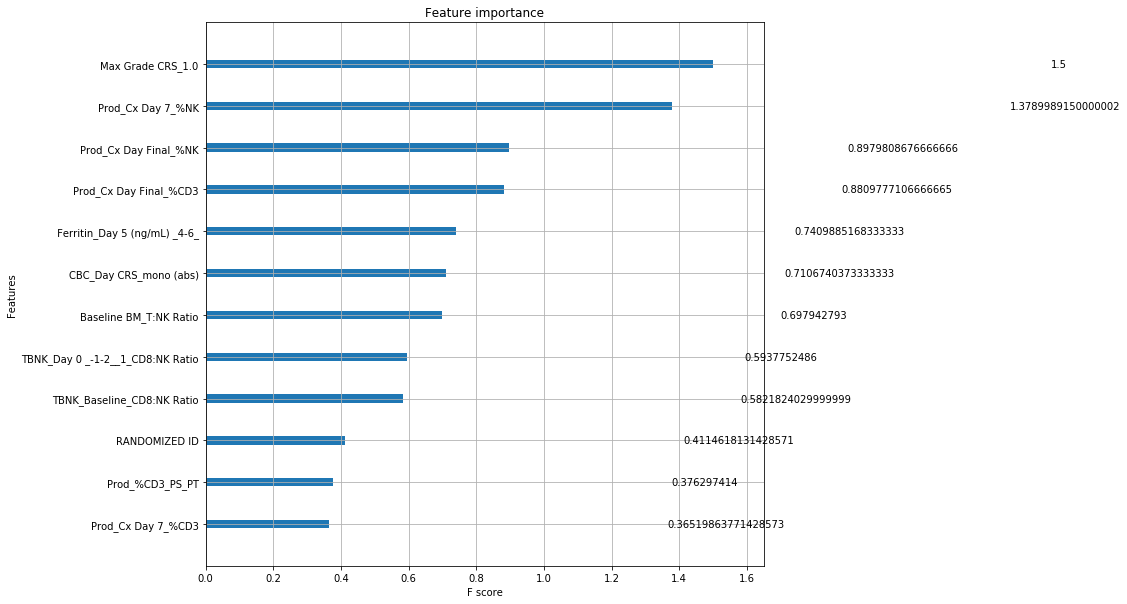

In [364]:

xg_classif_tune_train = xgb.train(params= params_tune, dtrain = X_train_dmatrix, num_boost_round=10)

#xgb.plot_importance(xg_classif_tune_train, importance_type = 'weight')
#xgb.plot_importance(xg_classif_tune_train, importance_type = 'cover')
xgb.plot_importance(xg_classif_tune_train, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

[0]	validation_0-error:0.25641	validation_0-logloss:0.664591	validation_1-error:0.25	validation_1-logloss:0.661879
[1]	validation_0-error:0.128205	validation_0-logloss:0.624615	validation_1-error:0.25	validation_1-logloss:0.636207
[2]	validation_0-error:0.102564	validation_0-logloss:0.599727	validation_1-error:0.25	validation_1-logloss:0.619553
[3]	validation_0-error:0.102564	validation_0-logloss:0.561911	validation_1-error:0.2	validation_1-logloss:0.591347
[4]	validation_0-error:0.102564	validation_0-logloss:0.535961	validation_1-error:0.2	validation_1-logloss:0.581528
[5]	validation_0-error:0.102564	validation_0-logloss:0.511899	validation_1-error:0.2	validation_1-logloss:0.567468
[6]	validation_0-error:0.102564	validation_0-logloss:0.49233	validation_1-error:0.25	validation_1-logloss:0.551925
[7]	validation_0-error:0.102564	validation_0-logloss:0.478238	validation_1-error:0.25	validation_1-logloss:0.537982
[8]	validation_0-error:0.051282	validation_0-logloss:0.45291	validation_1-err

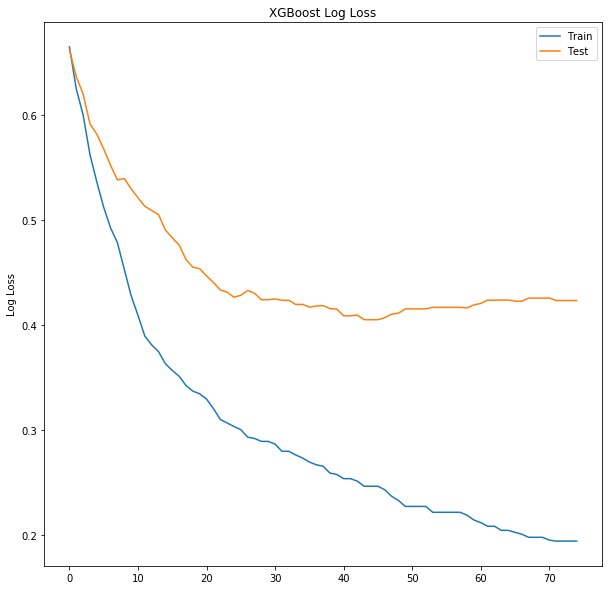

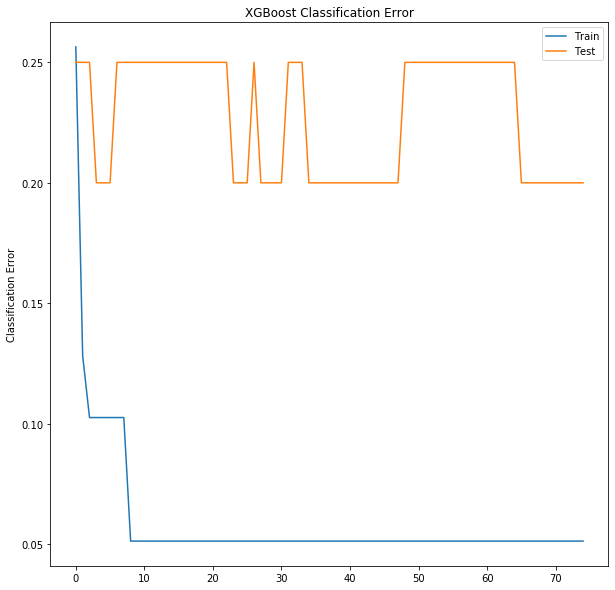

In [365]:
# plot classification error rate and log loss for tuned dataset

from numpy import loadtxt
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

model = xg_class_tuned
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()




[0]	validation_0-error:0.076923	validation_0-logloss:0.634882	validation_1-error:0.3	validation_1-logloss:0.662067
[1]	validation_0-error:0.076923	validation_0-logloss:0.589775	validation_1-error:0.3	validation_1-logloss:0.639466
[2]	validation_0-error:0.128205	validation_0-logloss:0.550912	validation_1-error:0.25	validation_1-logloss:0.621435
[3]	validation_0-error:0.128205	validation_0-logloss:0.51716	validation_1-error:0.25	validation_1-logloss:0.6071
[4]	validation_0-error:0.128205	validation_0-logloss:0.487654	validation_1-error:0.25	validation_1-logloss:0.595797
[5]	validation_0-error:0.025641	validation_0-logloss:0.451789	validation_1-error:0.3	validation_1-logloss:0.584724
[6]	validation_0-error:0.025641	validation_0-logloss:0.420067	validation_1-error:0.35	validation_1-logloss:0.576464
[7]	validation_0-error:0.025641	validation_0-logloss:0.399008	validation_1-error:0.3	validation_1-logloss:0.57115
[8]	validation_0-error:0.025641	validation_0-logloss:0.372818	validation_1-error

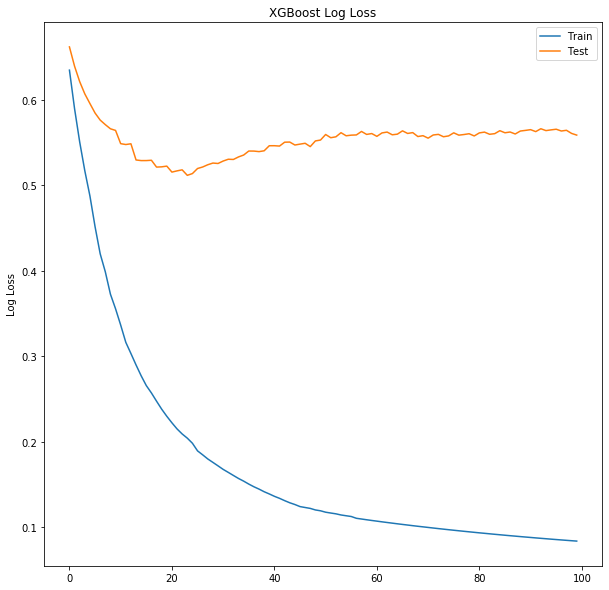

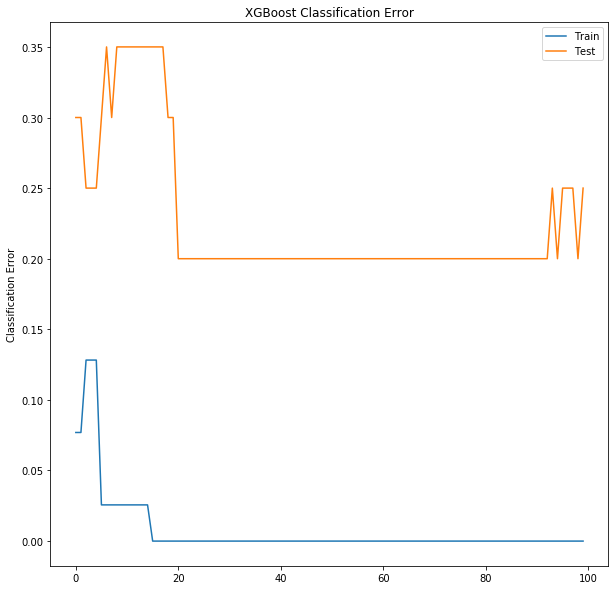

In [366]:
#compared to log loss and classification error rate using default test parameters for comparison

model = xg_class
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost Tuned: ROC AUC=0.747


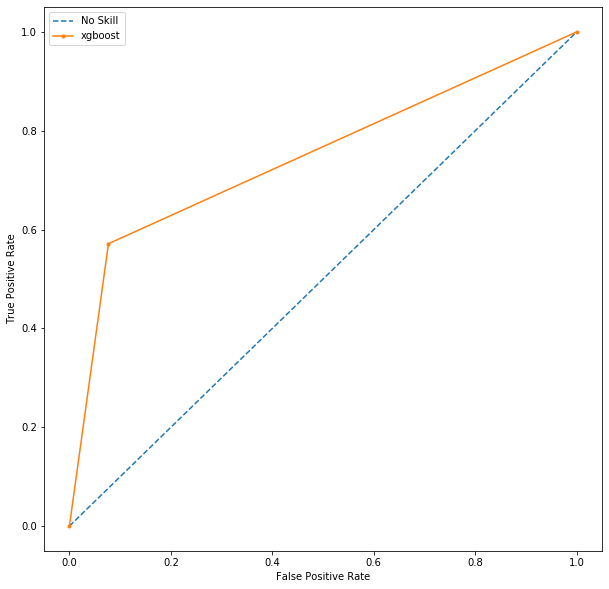

In [367]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


#Generally, the use of ROC curves and precision-recall curves are as follows:

##ROC curves should be used when there are roughly equal numbers of observations for each class.
##Precision-Recall curves should be used when there is a moderate to large class imbalance.


# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# split into train/test sets
# implementing train-test-split [performed above already]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#fitting model
#xg_class = xgb.XGBClassifier(objective ='binary:logistic', random_state = seed, cv=cv)
#xg_class.fit(X_train,y_train)

#making preds
preds_tuned = xg_class_tuned.predict(X_test)

preds_tuned
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]; ns_probs

# keep probabilities for the positive outcome only
#HOW??
preds_probs = preds_tuned

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
preds_auc = roc_auc_score(y_test, preds_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost Tuned: ROC AUC=%.3f' % (preds_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
preds_fpr, preds_tpr, _ = roc_curve(y_test, preds_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(preds_fpr, preds_tpr, marker='.', label='xgboost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

XGBoost Tuned: f1=0.667 auc=0.761


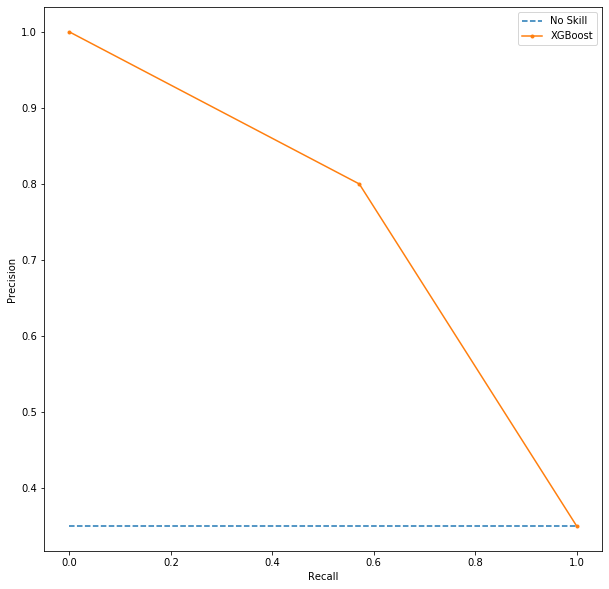

In [368]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# generate 2 class dataset
#X = df_noTCS.drop(columns=['HLH (0=No/1=Yes)'], axis=1); X
#y = df_noTCS['HLH (0=No/1=Yes)']; y

# split into train/test sets
# implementing train-test-split [performed above already]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# fit a model
#xg_class = xgb.XGBClassifier(objective ='binary:logistic', random_state = seed, cv=cv)
#xg_class.fit(X_train,y_train)
preds_tuned = xg_class_tuned.predict(X_test)

preds_tuned
# keep probabilities for the positive outcome only
#HOW??
preds_probs = preds_tuned


# predict class values
yhat = xg_class_tuned.predict(X_test)
preds_precision, preds_recall, _ = precision_recall_curve(y_test, preds_probs)
preds_f1, preds_auc = f1_score(y_test, yhat), auc(preds_recall, preds_precision)
# summarize scores
print('XGBoost Tuned: f1=%.3f auc=%.3f' % (preds_f1, preds_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(preds_recall, preds_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ValueError: Unable to parse node: 0:[Prod_Cx

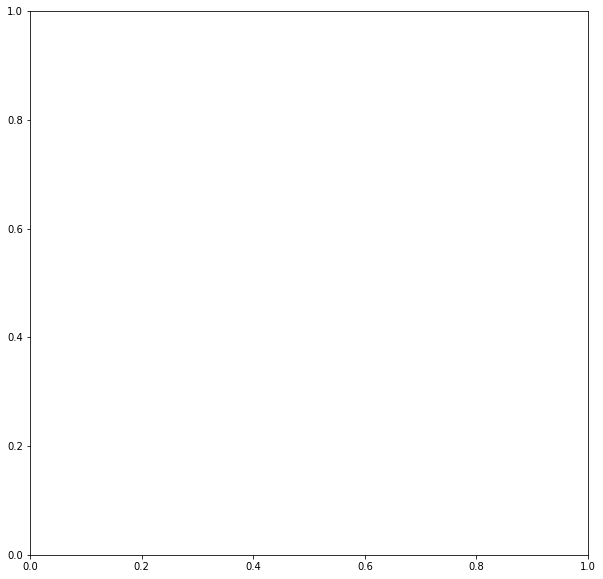

In [223]:
# plot decision tree
#!pip install graphviz
from xgboost import plot_tree
from numpy import loadtxt
import matplotlib.pyplot as plt


#model = xgboost.XGBClassifier()
#model.fit(X, y)

plot_tree(xg_class_tuned, num_trees=10)
fig = plt.gcf()
fig.set_size_inches(30, 15)


# Remaining To Do


## Additional Modeling

-Log Reg +/- RF
- with MICE (Multivariate Imputation via Chained Equations)
-without MICE (recreating prior model)

## Prospective Validation (Eventually)
- Additional 5-10 pts in cohort
    - Determine best way to plug in new data
    
## Other
- Figure out how to show and isolate columns with a certain proportion of missing data or above 
- print decision trees!

# Limitations
- Small Dataset

# NEXT STEP


## MICE

In [ ]:
df_noTCS.head()

In [ ]:
df_noTCS.shape

In [37]:
df_noTCS.isna().sum()
#should drop final%NK b/c of skewed data loss of early cohort
#should drop day 0 since nearly half of participantss missing values

HLH (0=No/1=Yes)                     0
Baseline BM_T:NK Ratio               4
 Ferritin_Day 5 (ng/mL) _4-6_       13
TBNK_Baseline_CD8:NK Ratio           0
TBNK_Day 0 _-1-2__1_CD8:NK Ratio    27
Prod_%CD3_PS_PT                      5
Prod_Cx Day 7_%CD3                   0
Prod_Cx Day 7_%NK                    1
Prod_Cx Day Final_%CD3               0
Prod_Cx Day Final_%NK               18
CBC_Day CRS_mono (abs)               7
Max Grade CRS_1.0                    0
Max Grade CRS_2.0                    0
RANDOMIZED ID                        0
dtype: int64

# LOGISTIC REGRESSION

In [38]:
df_4LOGREG = df_noTCS.drop(columns = ['TBNK_Day 0 _-1-2__1_CD8:NK Ratio', 'Prod_Cx Day Final_%NK', ' Ferritin_Day 5 (ng/mL) _4-6_']); df_4LOGREG

,HLH (0=No/1=Yes),Baseline BM_T:NK Ratio,TBNK_Baseline_CD8:NK Ratio,Prod_%CD3_PS_PT,Prod_Cx Day 7_%CD3,Prod_Cx Day 7_%NK,Prod_Cx Day Final_%CD3,CBC_Day CRS_mono (abs),Max Grade CRS_1.0,Max Grade CRS_2.0,RANDOMIZED ID
0,0.0,0.396783,13.325000,85.80,99.80,0.00,99.90,290.0,1,0,6
1,0.0,0.552189,1.242424,NaN,99.70,0.00,99.90,1.0,1,0,9
3,0.0,8.705882,13.718750,88.90,99.80,0.10,99.80,NaN,0,0,25
4,0.0,1.438830,1.255556,80.30,99.40,0.20,99.80,120.0,0,1,37
5,0.0,7.909091,3.627119,83.30,99.70,0.00,99.90,20.0,1,0,41
6,0.0,1.518797,0.583587,82.50,99.70,0.20,99.90,NaN,0,0,49
9,1.0,25.315789,2.295082,93.60,99.80,0.00,99.90,100.0,0,1,95
10,1.0,10.957447,6.884058,91.90,99.90,0.00,99.80,30.0,0,1,143
11,0.0,3.886010,14.368421,88.60,99.80,0.10,99.90,100.0,0,1,145
12,1.0,13.523077,14.230769,94.04,99.84,0.04,99.82,20.0,0,1,173


In [46]:
df_4LOGREG.corr('spearman')

forLOGREG_corr = df_4LOGREG.corr('spearman')
forLOGREG_corr['HLH (0=No/1=Yes)']

HLH (0=No/1=Yes)              1.000000
Baseline BM_T:NK Ratio        0.454762
TBNK_Baseline_CD8:NK Ratio    0.322209
Prod_%CD3_PS_PT               0.333418
Prod_Cx Day 7_%CD3            0.353579
Prod_Cx Day 7_%NK            -0.472912
Prod_Cx Day Final_%CD3        0.358045
CBC_Day CRS_mono (abs)       -0.304395
Max Grade CRS_1.0            -0.303339
Max Grade CRS_2.0             0.482456
RANDOMIZED ID                 0.209952
Name: HLH (0=No/1=Yes), dtype: float64

# RANDOM FOREST

In [155]:
df_4MICE = df_noTCS.drop(columns = ['TBNK_Day 0 _-1-2__1_CD8:NK Ratio', 'Prod_Cx Day Final_%NK']); df_4MICE

,HLH (0=No/1=Yes),Baseline BM_T:NK Ratio,Ferritin_Day 5 (ng/mL) _4-6_,TBNK_Baseline_CD8:NK Ratio,Prod_%CD3_PS_PT,Prod_Cx Day 7_%CD3,Prod_Cx Day 7_%NK,Prod_Cx Day Final_%CD3,CBC_Day CRS_mono (abs),Max Grade CRS_1.0,Max Grade CRS_2.0,RANDOMIZED ID
0,0.0,0.396783,8047.0,13.325000,85.80,99.80,0.00,99.90,290.0,1,0,6
1,0.0,0.552189,NaN,1.242424,NaN,99.70,0.00,99.90,1.0,1,0,9
3,0.0,8.705882,NaN,13.718750,88.90,99.80,0.10,99.80,NaN,0,0,25
4,0.0,1.438830,NaN,1.255556,80.30,99.40,0.20,99.80,120.0,0,1,37
5,0.0,7.909091,NaN,3.627119,83.30,99.70,0.00,99.90,20.0,1,0,41
6,0.0,1.518797,325.0,0.583587,82.50,99.70,0.20,99.90,NaN,0,0,49
9,1.0,25.315789,1701.0,2.295082,93.60,99.80,0.00,99.90,100.0,0,1,95
10,1.0,10.957447,2318.0,6.884058,91.90,99.90,0.00,99.80,30.0,0,1,143
11,0.0,3.886010,1258.0,14.368421,88.60,99.80,0.10,99.90,100.0,0,1,145
12,1.0,13.523077,9059.0,14.230769,94.04,99.84,0.04,99.82,20.0,0,1,173


In [156]:
df_4MICE.isna().sum()

HLH (0=No/1=Yes)                  0
Baseline BM_T:NK Ratio            4
 Ferritin_Day 5 (ng/mL) _4-6_    13
TBNK_Baseline_CD8:NK Ratio        0
Prod_%CD3_PS_PT                   5
Prod_Cx Day 7_%CD3                0
Prod_Cx Day 7_%NK                 1
Prod_Cx Day Final_%CD3            0
CBC_Day CRS_mono (abs)            7
Max Grade CRS_1.0                 0
Max Grade CRS_2.0                 0
RANDOMIZED ID                     0
dtype: int64

In [157]:
df_4MICE

,HLH (0=No/1=Yes),Baseline BM_T:NK Ratio,Ferritin_Day 5 (ng/mL) _4-6_,TBNK_Baseline_CD8:NK Ratio,Prod_%CD3_PS_PT,Prod_Cx Day 7_%CD3,Prod_Cx Day 7_%NK,Prod_Cx Day Final_%CD3,CBC_Day CRS_mono (abs),Max Grade CRS_1.0,Max Grade CRS_2.0,RANDOMIZED ID
0,0.0,0.396783,8047.0,13.325000,85.80,99.80,0.00,99.90,290.0,1,0,6
1,0.0,0.552189,NaN,1.242424,NaN,99.70,0.00,99.90,1.0,1,0,9
3,0.0,8.705882,NaN,13.718750,88.90,99.80,0.10,99.80,NaN,0,0,25
4,0.0,1.438830,NaN,1.255556,80.30,99.40,0.20,99.80,120.0,0,1,37
5,0.0,7.909091,NaN,3.627119,83.30,99.70,0.00,99.90,20.0,1,0,41
6,0.0,1.518797,325.0,0.583587,82.50,99.70,0.20,99.90,NaN,0,0,49
9,1.0,25.315789,1701.0,2.295082,93.60,99.80,0.00,99.90,100.0,0,1,95
10,1.0,10.957447,2318.0,6.884058,91.90,99.90,0.00,99.80,30.0,0,1,143
11,0.0,3.886010,1258.0,14.368421,88.60,99.80,0.10,99.90,100.0,0,1,145
12,1.0,13.523077,9059.0,14.230769,94.04,99.84,0.04,99.82,20.0,0,1,173


In [159]:
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.imputation import mice
from statsmodels.imputation.mice import MICE
from statsmodels.imputation.mice import MICEData


In [160]:
#!!!!statsmodels mice cannot take headers?!!!.

#renaming
newHeaderTitles = ['HLH', "Baseline_BM_T_NK", 'Ferr_5', 'Baseline_CD8_NK', 'Prod_PerCD3_PS_PT', 'Prod_CxD7_PerCD3', 
                                             'Prod_cxD7_PerNK', 'Prod_CxDFin_CD3', 'CBC_DCRS_mono', 'Max_gCRS_1', 'Max_gCRS_2', 'RANDOMIZED_ID']
df_4MICE_newcols = df_4MICE
df_4MICE_newcols.columns = [newHeaderTitles]
df_4MICE_newcols

,HLH,Baseline_BM_T_NK,Ferr_5,Baseline_CD8_NK,Prod_PerCD3_PS_PT,Prod_CxD7_PerCD3,Prod_cxD7_PerNK,Prod_CxDFin_CD3,CBC_DCRS_mono,Max_gCRS_1,Max_gCRS_2,RANDOMIZED_ID
0,0.0,0.396783,8047.0,13.325000,85.80,99.80,0.00,99.90,290.0,1,0,6
1,0.0,0.552189,NaN,1.242424,NaN,99.70,0.00,99.90,1.0,1,0,9
3,0.0,8.705882,NaN,13.718750,88.90,99.80,0.10,99.80,NaN,0,0,25
4,0.0,1.438830,NaN,1.255556,80.30,99.40,0.20,99.80,120.0,0,1,37
5,0.0,7.909091,NaN,3.627119,83.30,99.70,0.00,99.90,20.0,1,0,41
6,0.0,1.518797,325.0,0.583587,82.50,99.70,0.20,99.90,NaN,0,0,49
9,1.0,25.315789,1701.0,2.295082,93.60,99.80,0.00,99.90,100.0,0,1,95
10,1.0,10.957447,2318.0,6.884058,91.90,99.90,0.00,99.80,30.0,0,1,143
11,0.0,3.886010,1258.0,14.368421,88.60,99.80,0.10,99.90,100.0,0,1,145
12,1.0,13.523077,9059.0,14.230769,94.04,99.84,0.04,99.82,20.0,0,1,173


In [162]:
df_MICE = MICEData(df_4MICE_newcols)

TypeError: can only concatenate tuple (not "str") to tuple

In [163]:
import fancyimpute

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/danlichtenstein/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/Users/danlichtenstein/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/Users/danlichtenstein/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/Users/danlichtenstein/opt/anaconda3/lib/python3.7/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/Users/danlichtenstein/opt/anaconda3/lib/python3.7/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: dlopen(/Users/danlichtenstein/opt/anaconda3/l

TypeError: can only concatenate str (not "list") to str

In [151]:
fml = 'y ~ x1 + x2 + x3 + x4'
mice = mice.MICE(fml, sm.OLS, imp)
results = mice.fit(10, 10)
print(results.summary())

TypeError: can only concatenate tuple (not "str") to tuple

In [97]:
print(results.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
#!!!!fancy impute removes column names!!!.
df_4MICE_cols = list(df_4MICE); df_4MICE_cols

In [ ]:
# Use MICE to fill in each row's missing features
df_MICE = pd.DataFrame(MICE(verbose=False).complete(df_MICE))
df_MICE.columns = df_4MICE_cols